In [1]:
import netCDF4
import xarray as xr
import numpy as np
import pandas as pd
import os, glob
import matplotlib.pyplot as plt
import geopandas as gpd
from datetime import timedelta
from scipy.stats import pearsonr
import cartopy.crs as ccrs
import seaborn as sns
from matplotlib.pyplot import figure

In [2]:
from ipynb.fs.defs.Chrisdata_analysis import buckdata, projection
csv = [pd.read_csv(f) for f in glob.glob("/data/dhence/a/pborse2/inputdata/ISWS_data/Champaign/*.csv")]
from ipynb.fs.defs.ISWSdataset_Champaign import aprnov
csvlist = [aprnov(csv)[i] for i in range(len(csv))]
os.chdir('/data/dhence/a/pborse2/inputdata/data.eol.ucar.edu/pub/download/extra/katz_data/stage4/daily_data')
fi = [f for f in glob.glob('*.nc')]
fi.sort()

/data/keeling/a/pborse2/Deanna Research/Research/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

/data/keeling/a/pborse2/Deanna Research/Research/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

/data/keeling/a/pborse2/Deanna Research/Research/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

/data/keeling/a/pborse2/Deanna Research/Research/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [3]:
temp = pd.concat(csvlist)

In [4]:
#Monthwise analysis
def monthlytemp(year, tempfile,attr,start,end):
    bucket = buckdata(year)
    may = pd.DataFrame(bucket[bucket.index.month==5].sum(axis=1),columns=['lar'])
    junjul = pd.DataFrame(bucket[bucket.index.month.isin(range(6,8))].sum(axis=1),columns=['lar'])
    augsep = pd.DataFrame(bucket[bucket.index.month.isin(range(8,10))].sum(axis=1),columns=['lar'])
    season = tempfile[tempfile.index.month.isin(range(6,10))][attr].mean()
    jjas = tempfile[(tempfile.index.month.isin(range(6,10)))&(tempfile.index.year==year)][attr].mean()
    for i in range(start,end):
        delt = may.index-timedelta(i)
        delt1 = junjul.index-timedelta(i)
        delt2 = augsep.index - timedelta(i)
        junjul['lag-'+str(i)]=(season - tempfile[tempfile.index.isin(delt1.date)][attr].values)/(season)
        augsep['lag-'+str(i)]= (season - tempfile[tempfile.index.isin(delt2.date)][attr].values)/(season)
        try:
            may['lag-'+str(i)]=list(tempfile[tempfile.index.isin(delt.date)][attr].values)
        except ValueError:
            t = tempfile[tempfile.index.isin(delt.date)]
            print(set(tempfile[tempfile.index.isin(delt.date)].index.date)-set(delt.date))
#             print(list(tempfile[tempfile.index.isin(delt.date)]['MAX AIR TEMP oF'].values))
    for i in range(2,len(junjul.columns)-1):
        may['mean-'+str(i)] = may[may.columns[1:i+1]].mean(axis=1)
        junjul['mean-'+str(i)] = junjul[junjul.columns[1:i+1]].mean(axis=1)
        augsep['mean-'+str(i)] = augsep[augsep.columns[1:i+1]].mean(axis=1)
        
    fig, axs = plt.subplots(ncols=4, gridspec_kw=dict(width_ratios=[1,1,1,0.05]),figsize=(22,22))
    try:
        sns.heatmap(may.corr(method='spearman')[['lar']],annot=True,ax=axs[0],vmin=-0.5,cbar=False)
    except:
        pass
    sns.heatmap(junjul.corr(method='spearman')[['lar']],annot=True,ax=axs[1],vmin=-0.5,cbar=False)
    sns.heatmap(augsep.corr(method='spearman')[['lar']],annot=True,ax=axs[2],vmin=-0.5,cbar=False)
    axs[0].set_title('May-'+attr+'-'+str(year),fontsize = 20)
    axs[1].set_title('Jun-Jul-'+attr+'-'+str(year),fontsize = 20)
    axs[2].set_title('Aug-Sept-'+attr+'-'+str(year),fontsize = 20)
    fig.colorbar(axs[1].collections[0], cax=axs[3])
    
    fig1, axs1 = plt.subplots(nrows=3, ncols=1,figsize=(20,20))
#     maysep.corr()[['lar']].plot(ax=axs1[0])
    axs1[0].axhline(0)
    junjul.corr(method='spearman')[['lar']].plot(ax=axs1[1])
    axs1[1].axhline(0)
    augsep.corr(method='spearman')[['lar']].plot(ax=axs1[2])
    plt.axhline(0)
    return junjul, augsep

In [5]:
rain = projection(fi)['tp'].sel(x=slice(734.5,737.5),y=slice(488,490.5)).mean(('x','y'))

In [6]:
missing = "2006-09-04T12:00:00.000000000"
miss1 = "2003-08-26T12:00:00.000000000"
# create an "empty" time slice with fillvalues
empty = xr.full_like(rain.isel(time=0), 0)
emp1 = xr.full_like(rain.isel(time=0), 0)
# fix the time coordinate of the timeslice
empty['time'] =pd.date_range(missing, periods=1)[0]
emp1['time']=pd.date_range(miss1, periods=1)[0]
# concat and sort time
rain = xr.concat([rain, empty,emp1], "time").sortby("time")


In [7]:
def monthly(year, rainfile,start,end):#give rain as input
    bucket = buckdata(year)
    r =rainfile.groupby('time.year')[year]
    may = pd.DataFrame(bucket[bucket.index.month==5].sum(axis=1),columns=['lar'])
    junjul = pd.DataFrame(bucket[bucket.index.month.isin(range(6,8))].sum(axis=1),columns=['lar'])
    augsep = pd.DataFrame(bucket[bucket.index.month.isin(range(8,10))].sum(axis=1),columns=['lar'])
    season = rainfile[rainfile>0].groupby('time.season').mean()[1].values
    std = rainfile[rainfile>0].groupby('time.season').std()[1].values
    jja = r[(r.time.dt.month.isin(range(6,9)))&(r>0)].mean()
    for i in range(start,end):
        delt = may.index-timedelta(i)
        delt1 = junjul.index-timedelta(i)
        delt2 = augsep.index - timedelta(i)
        junjul['lag-'+str(i)]= ((r[r.time.dt.date.isin(delt1.date)]-season)/std).values
        if(year==2003):
            try:
                augsep['lag-'+str(i)]= np.append(((r[r.time.dt.date.isin(delt2.date)]-season)/std).values,0)
#                 may['lag-'+str(i)]= np.append(rain[rain.time.dt.date.isin(delt.date)].values,0)
            except ValueError:
                augsep['lag-'+str(i)]= ((r[r.time.dt.date.isin(delt2.date)]-season)/std).values
    
        else:
            augsep['lag-'+str(i)]= ((r[r.time.dt.date.isin(delt2.date)]-season)/std).values
            may['lag-'+str(i)]= ((r[r.time.dt.date.isin(delt.date)]-season)/std).values
    for i in range(2,len(junjul.columns)-1):
        may['accum-'+str(i)] = may[may.columns[1:i+1]].sum(axis=1)
        junjul['accum-'+str(i)] = junjul[junjul.columns[1:i+1]].sum(axis=1)
        augsep['accum-'+str(i)] = augsep[augsep.columns[1:i+1]].sum(axis=1)
        
    fig, axs = plt.subplots(ncols=4, gridspec_kw=dict(width_ratios=[1,1,1,0.05]),figsize=(22,22))
    try:
        sns.heatmap(may.corr()[['lar']],annot=True,ax=axs[0],vmin=-0.5,cbar=False)
    except:
        pass
    sns.heatmap(junjul.corr(method='spearman')[['lar']],annot=True,ax=axs[1],vmin=-0.5,cbar=False)
    sns.heatmap(augsep.corr(method='spearman')[['lar']],annot=True,ax=axs[2],vmin=-0.5,cbar=False)
    axs[0].set_title('May-'+str(year),fontsize = 20)
    axs[1].set_title('Jun-Jul-'+str(year),fontsize = 20)
    axs[2].set_title('Aug-Sept-'+str(year),fontsize = 20)
    fig.colorbar(axs[1].collections[0], cax=axs[3])
    
    fig1, axs1 = plt.subplots(nrows=3, ncols=1,figsize=(20,20))
    try:
        may.corr()[['lar']].plot(ax=axs1[0])
        axs1[0].axhline(0)
    except:
        pass
    junjul.corr()[['lar']].plot(ax=axs1[1])
    axs1[1].axhline(0)
    augsep.corr()[['lar']].plot(ax=axs1[2])
    plt.axhline(0)
    return rain,junjul,augsep

/tmp/ipykernel_196495/2452271034.py:32: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(may.corr()[['lar']],annot=True,ax=axs[0],vmin=-0.5,cbar=False)
/tmp/ipykernel_196495/2452271034.py:44: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  may.corr()[['lar']].plot(ax=axs1[0])


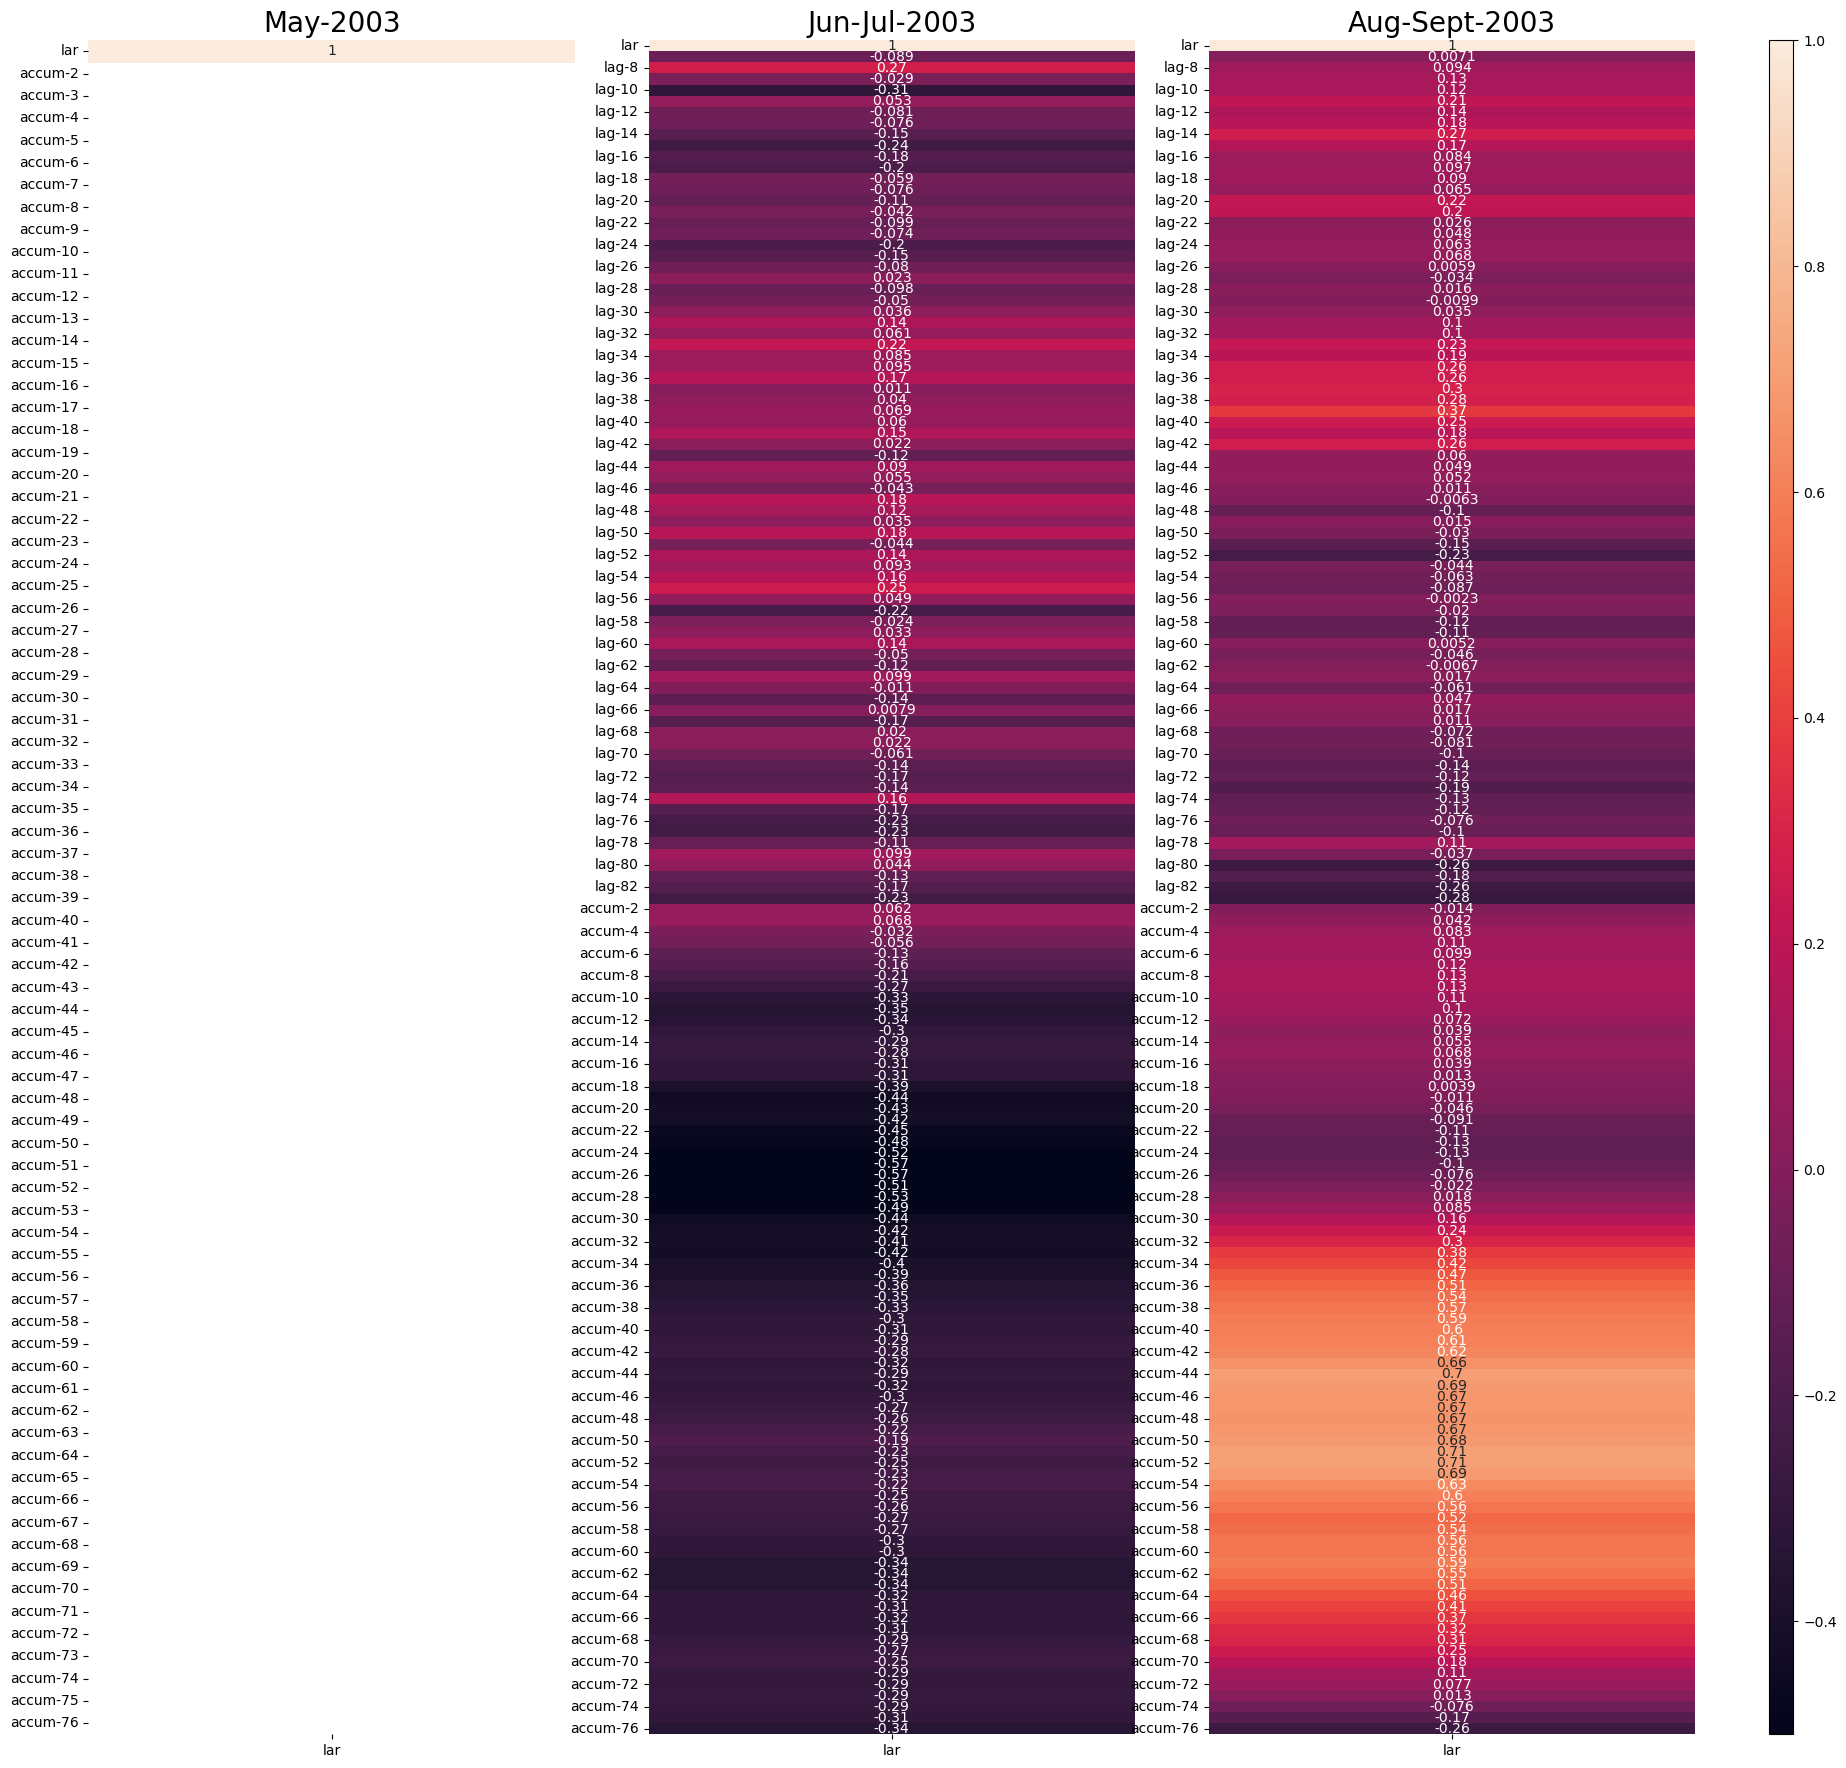

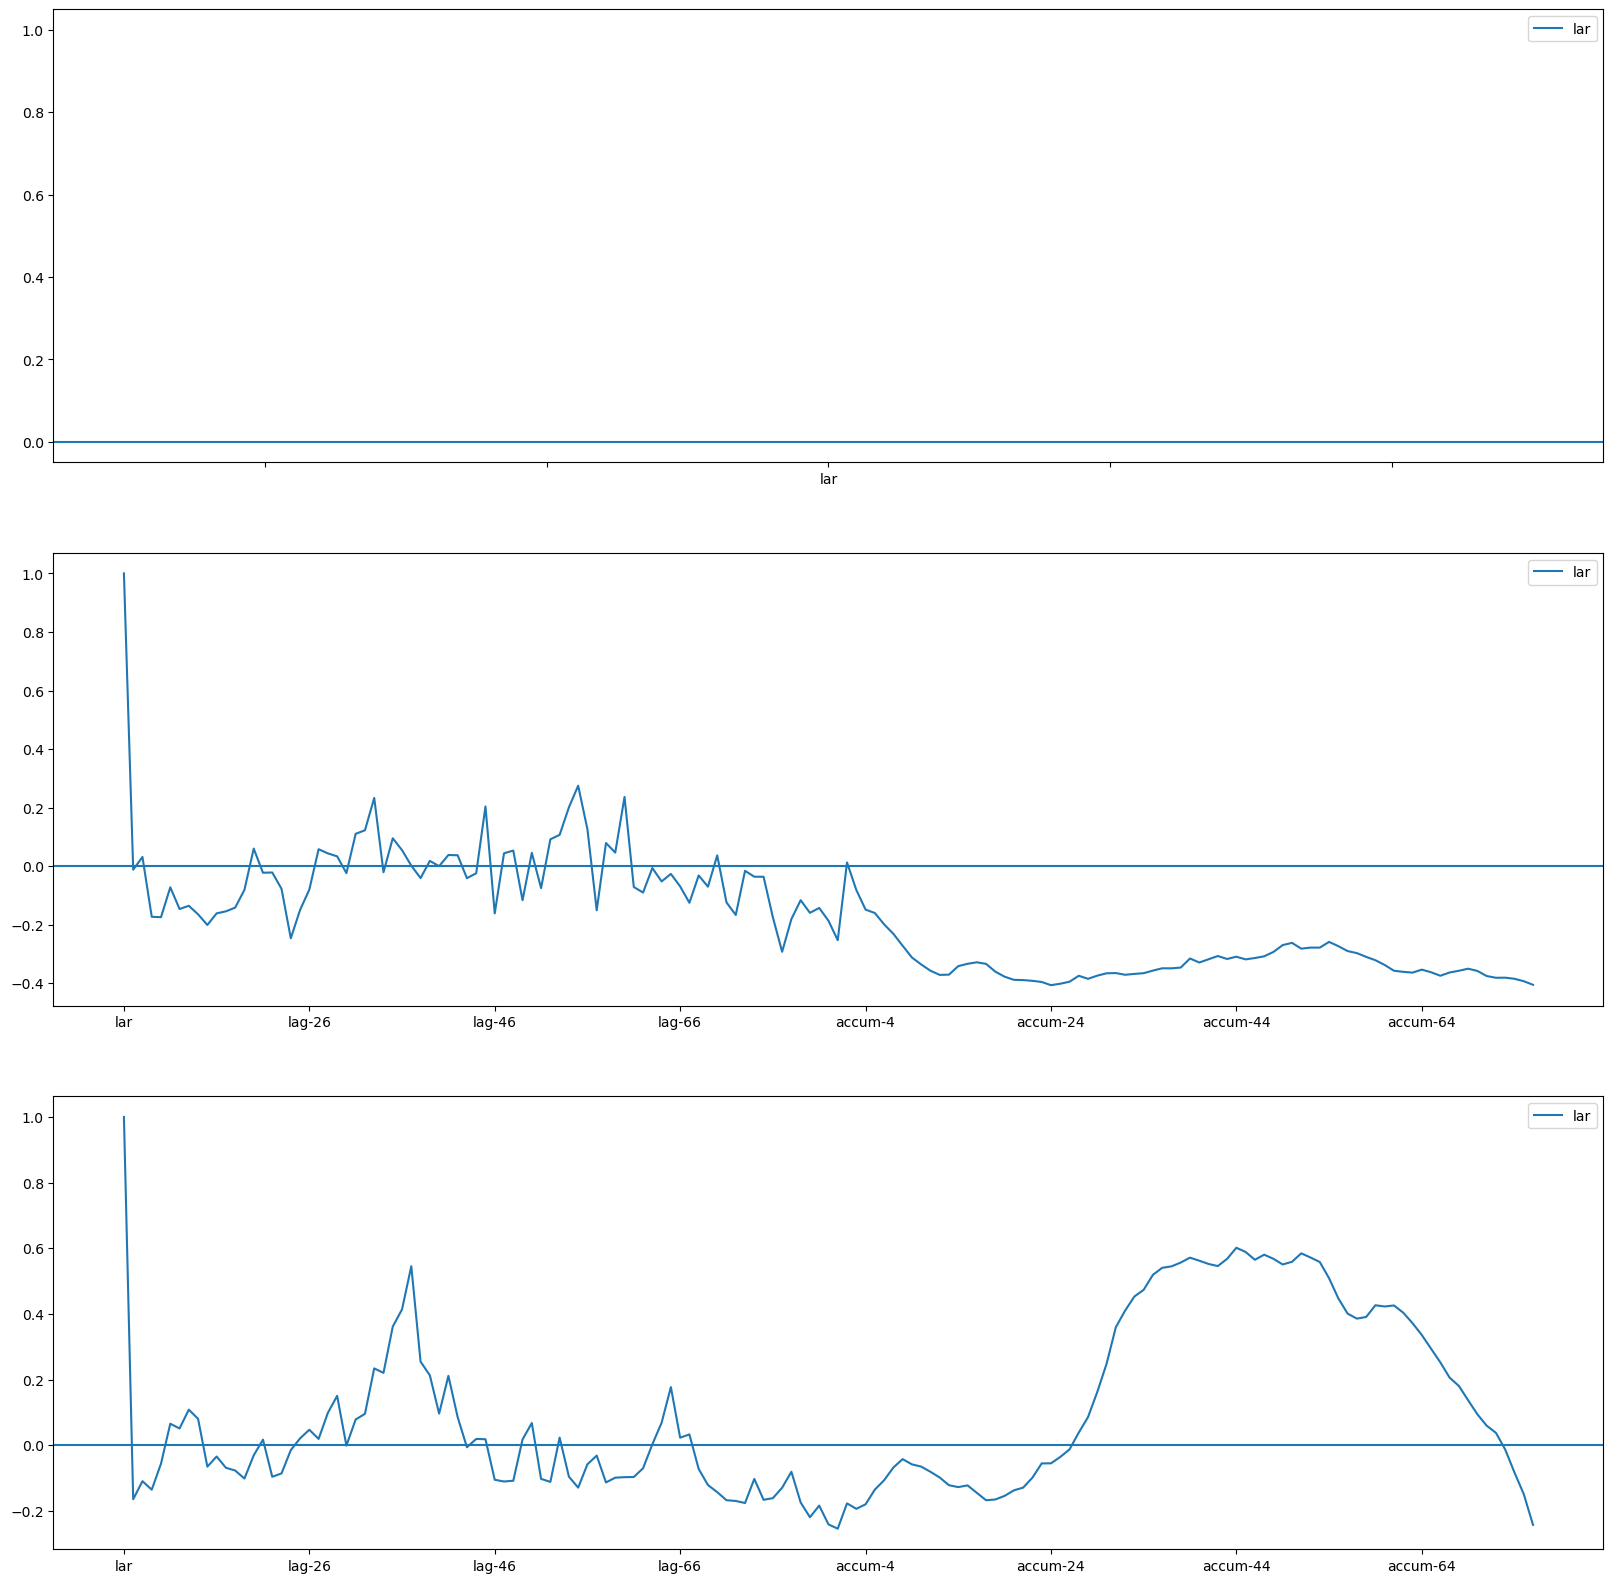

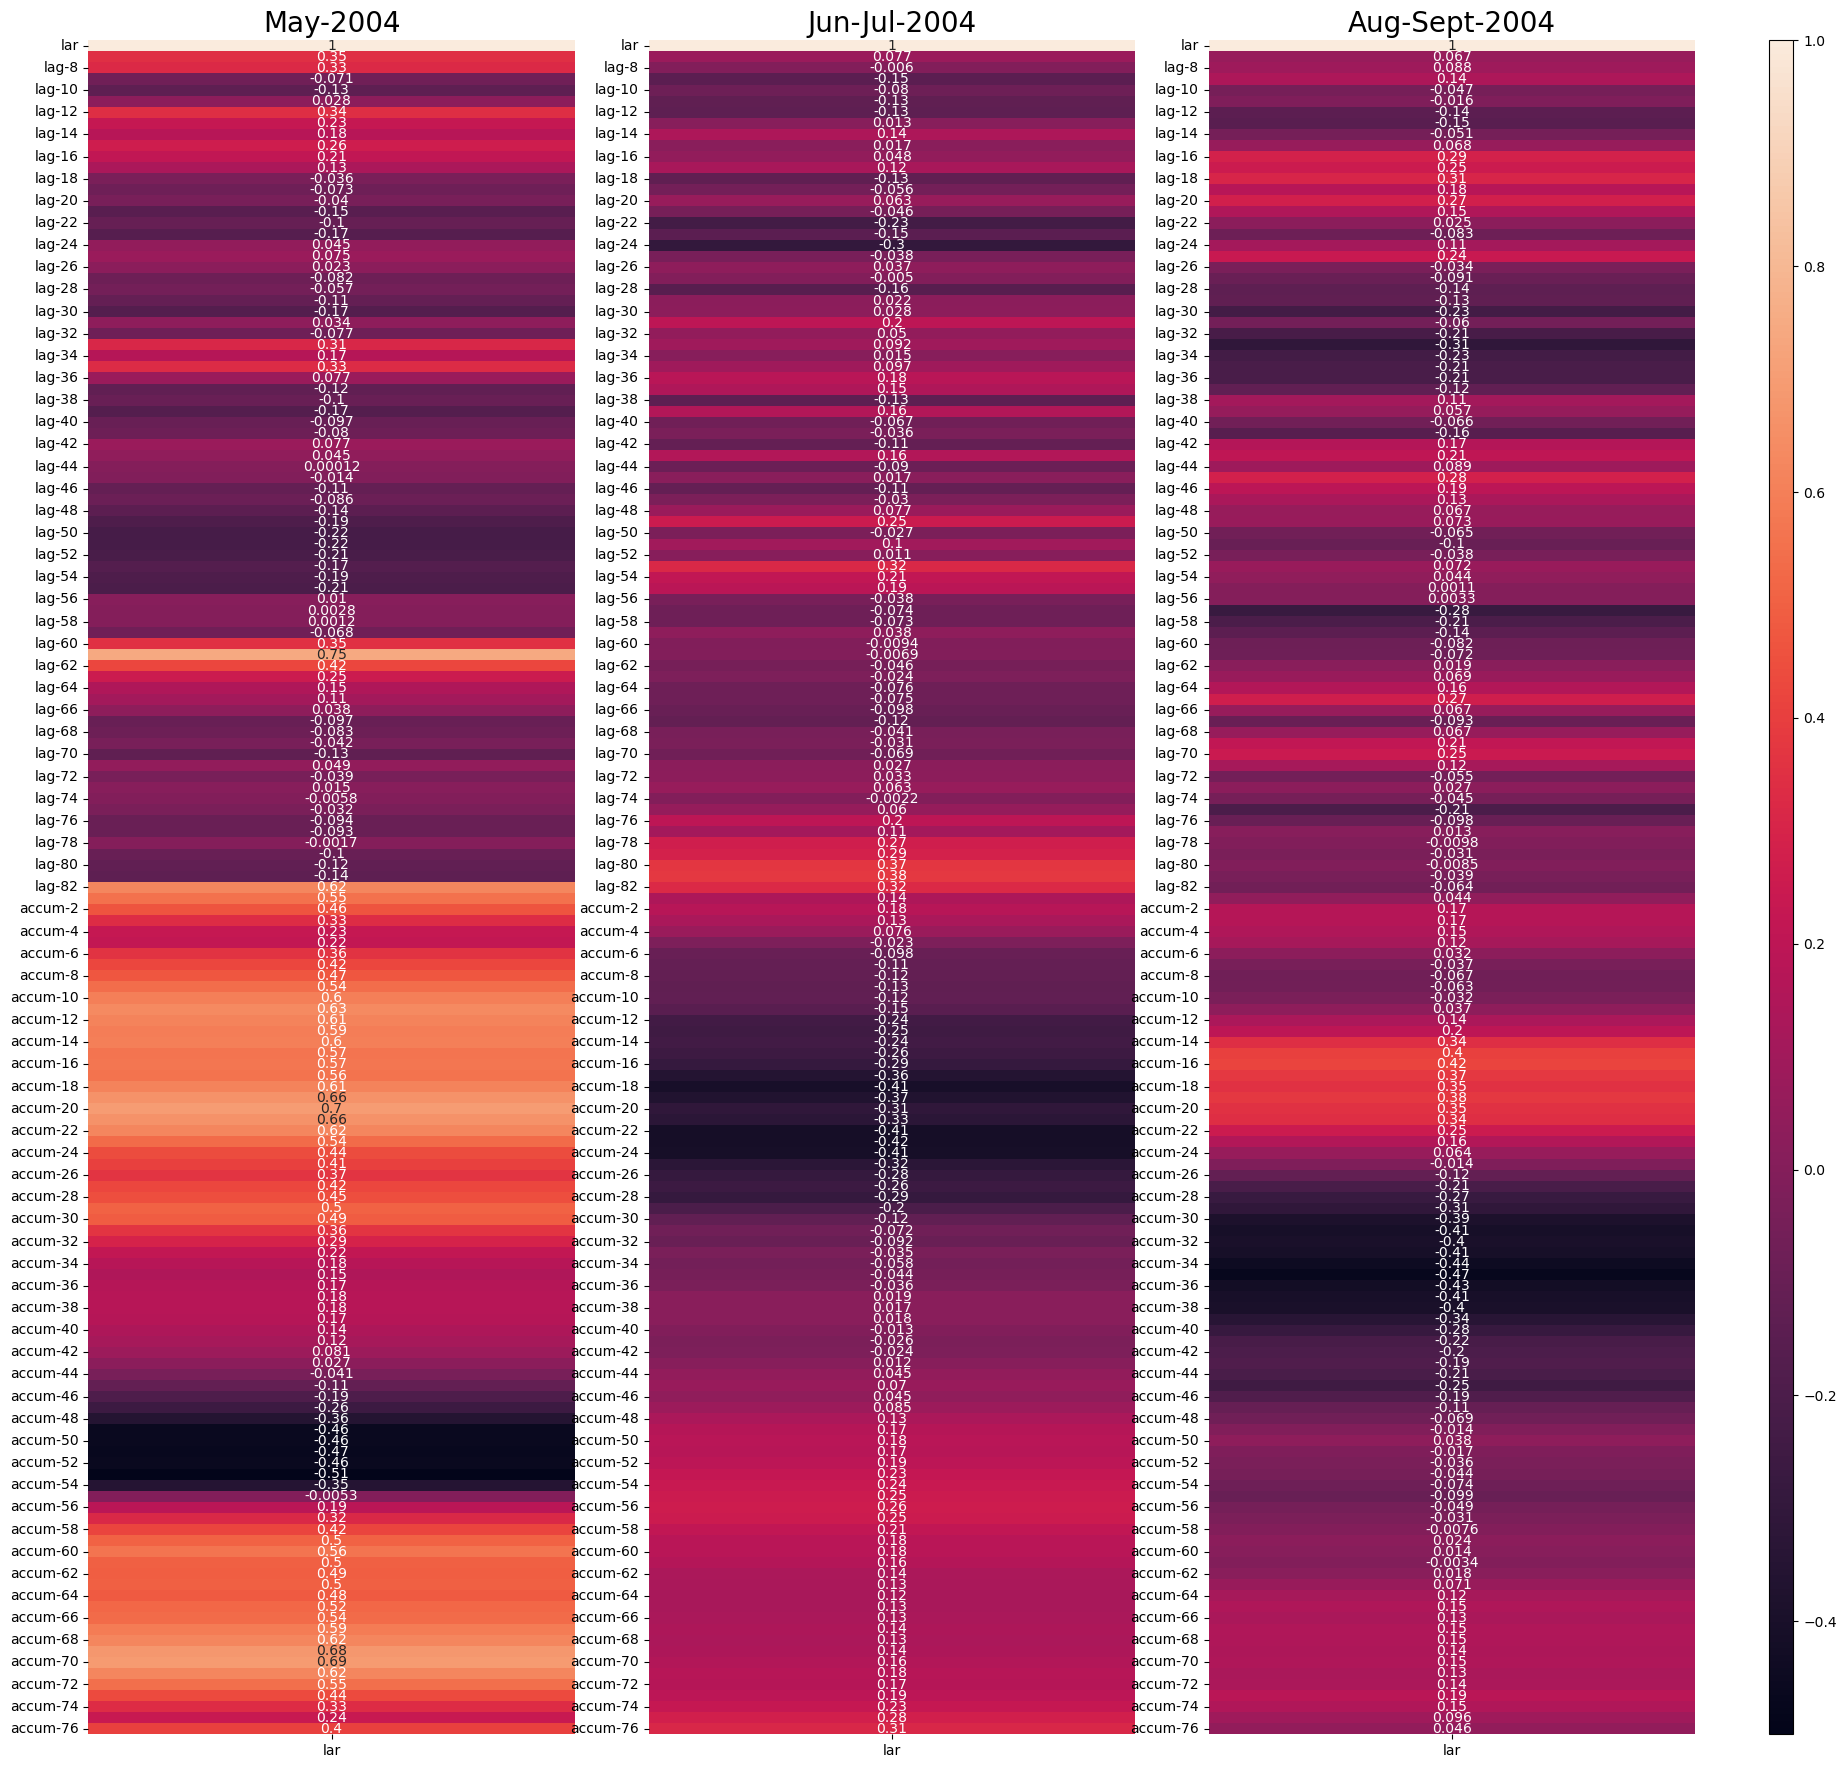

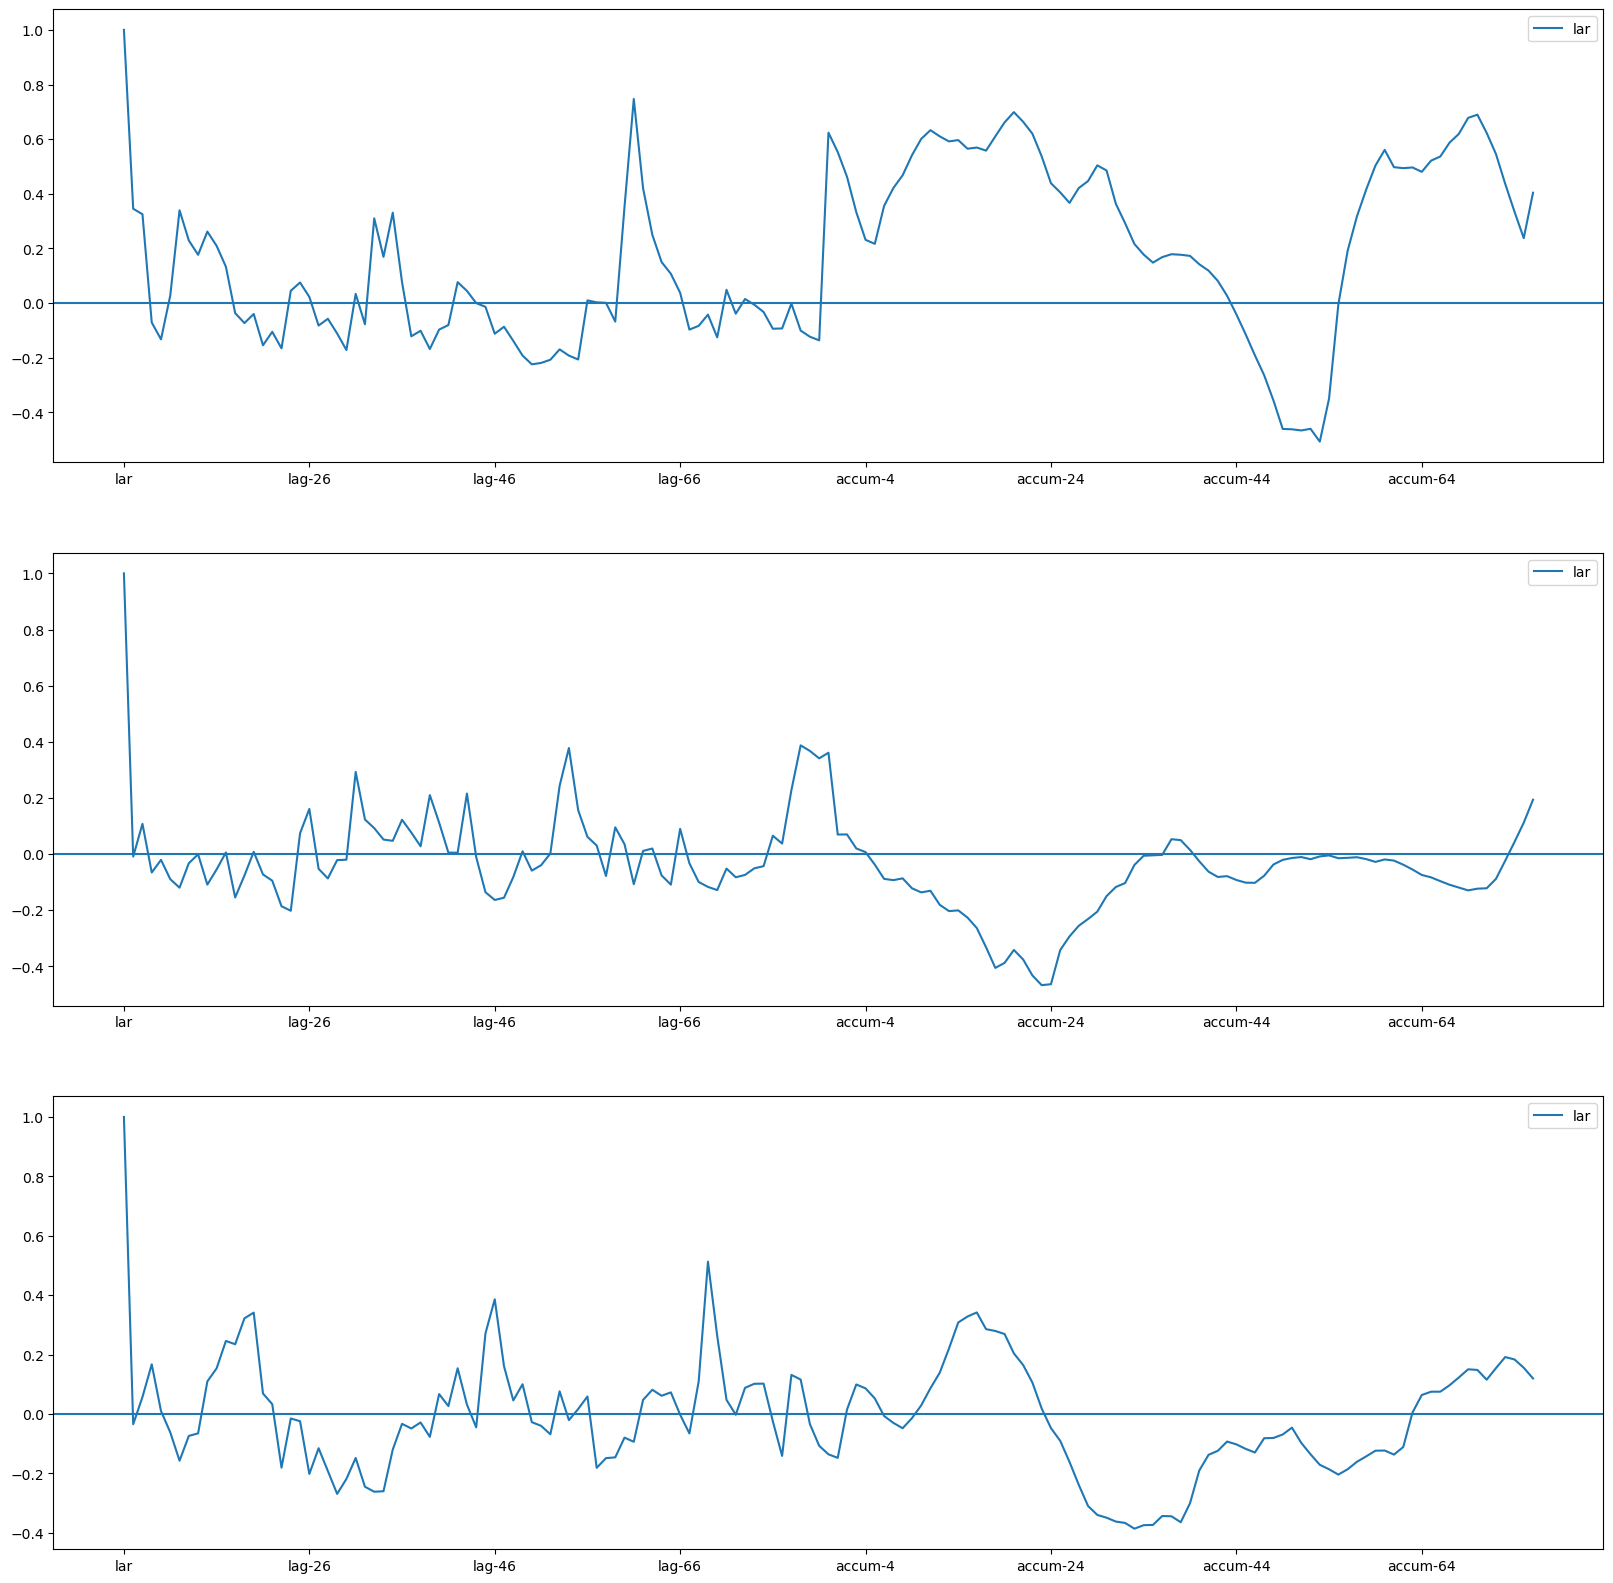

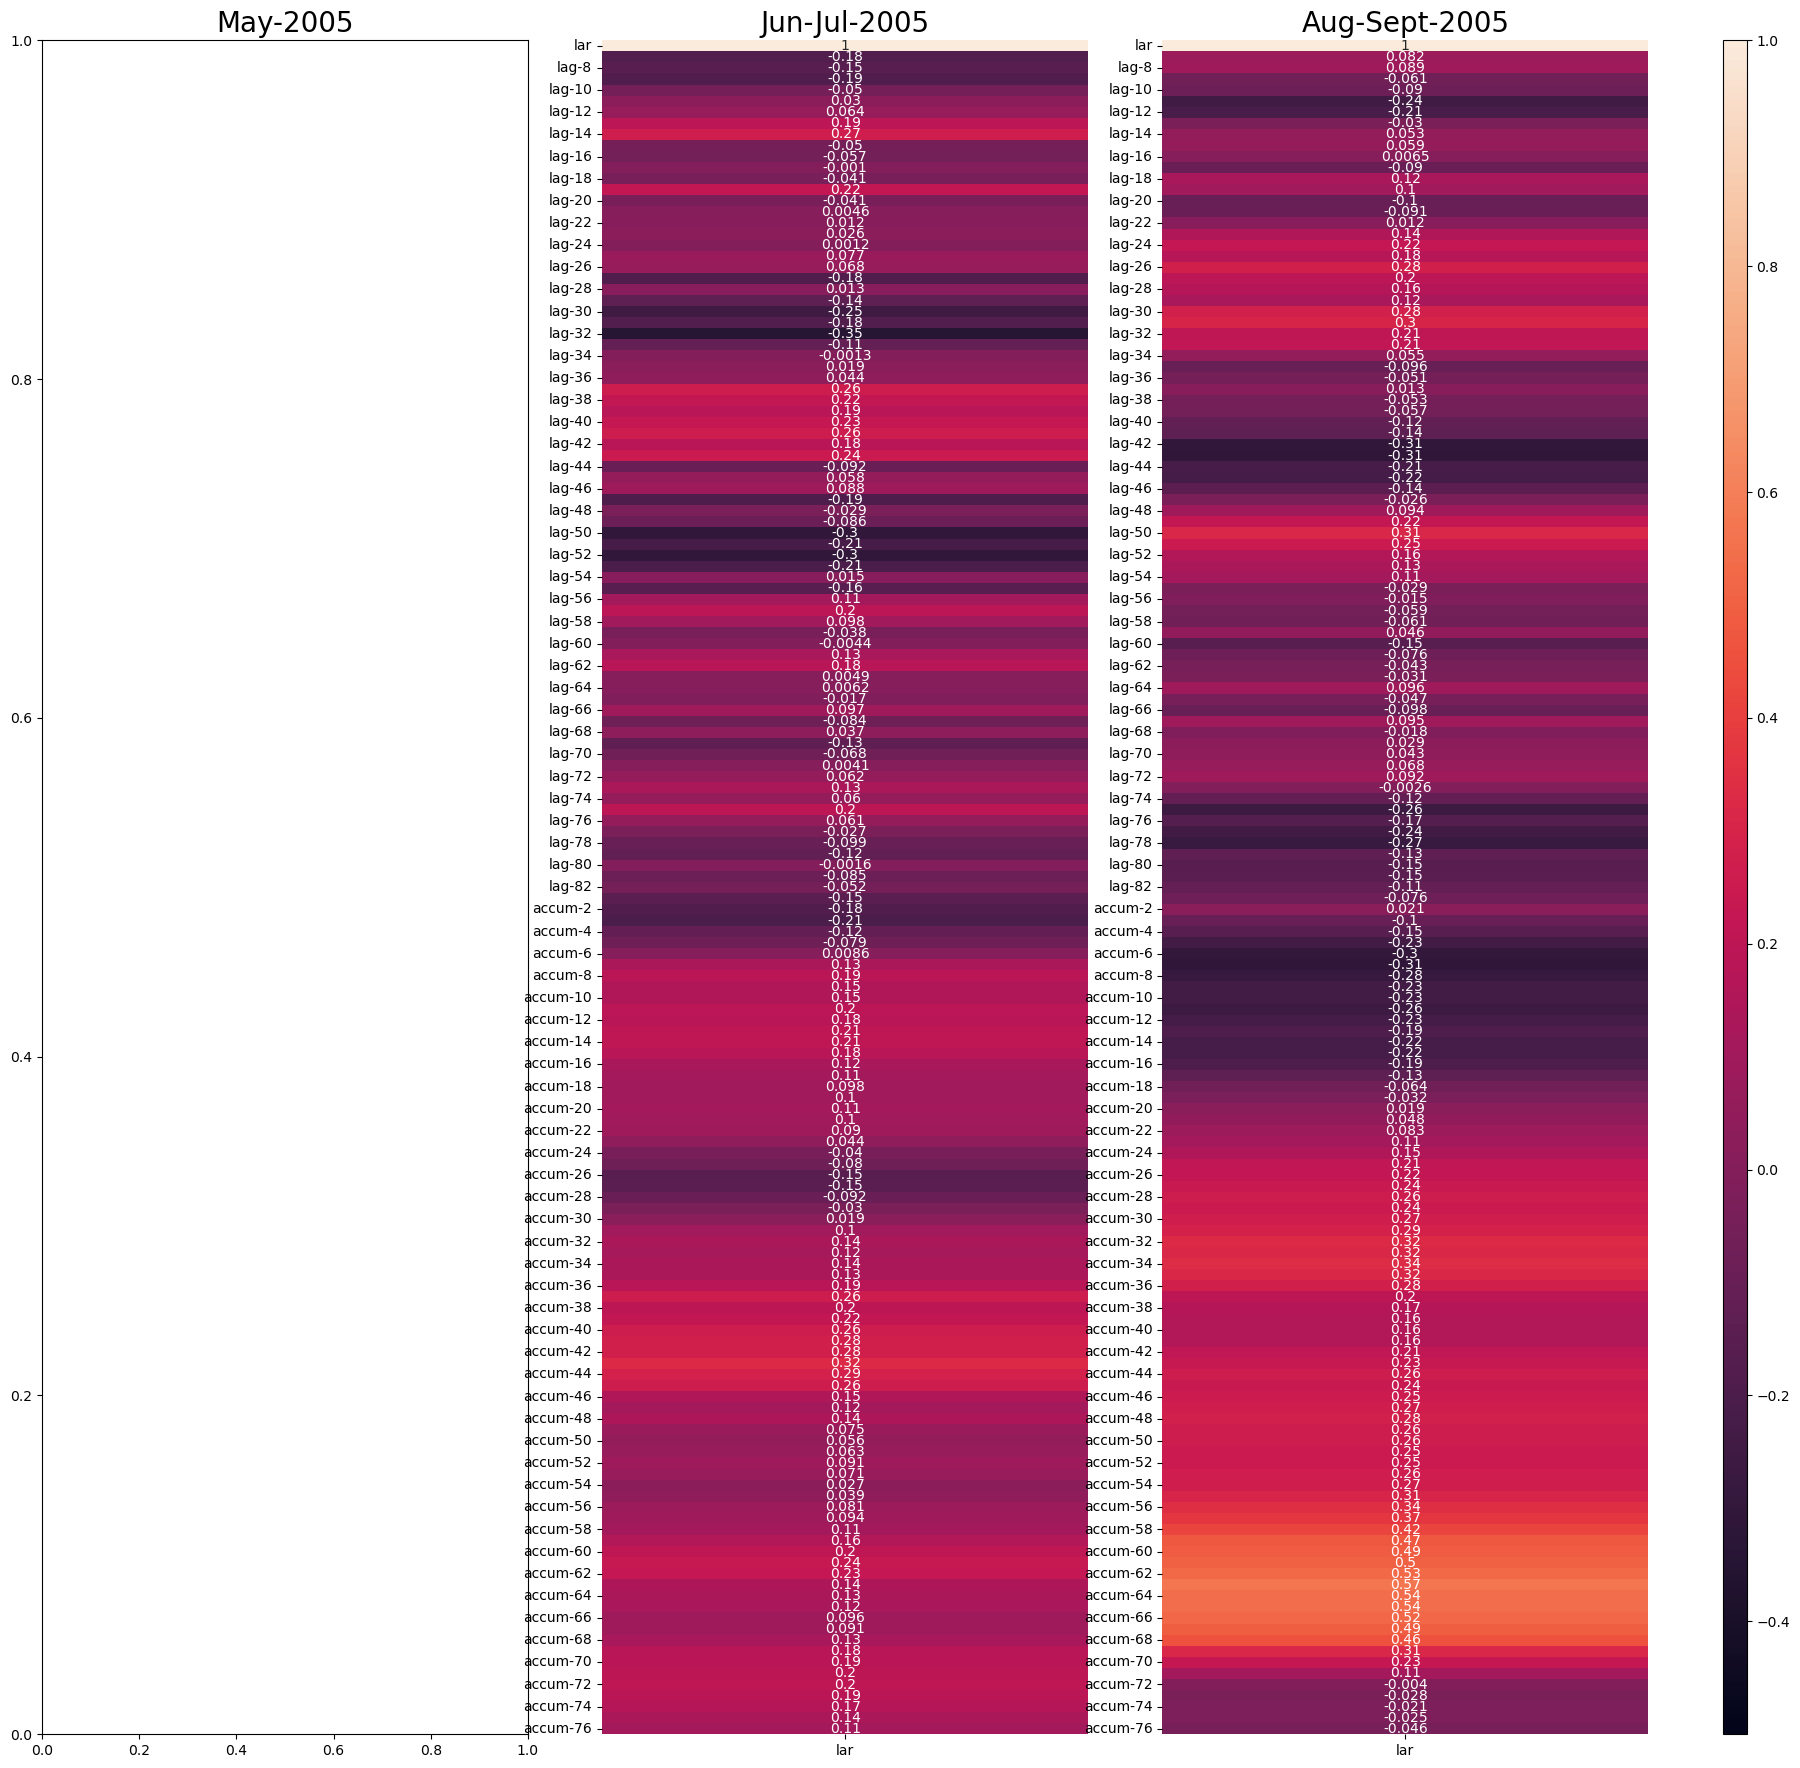

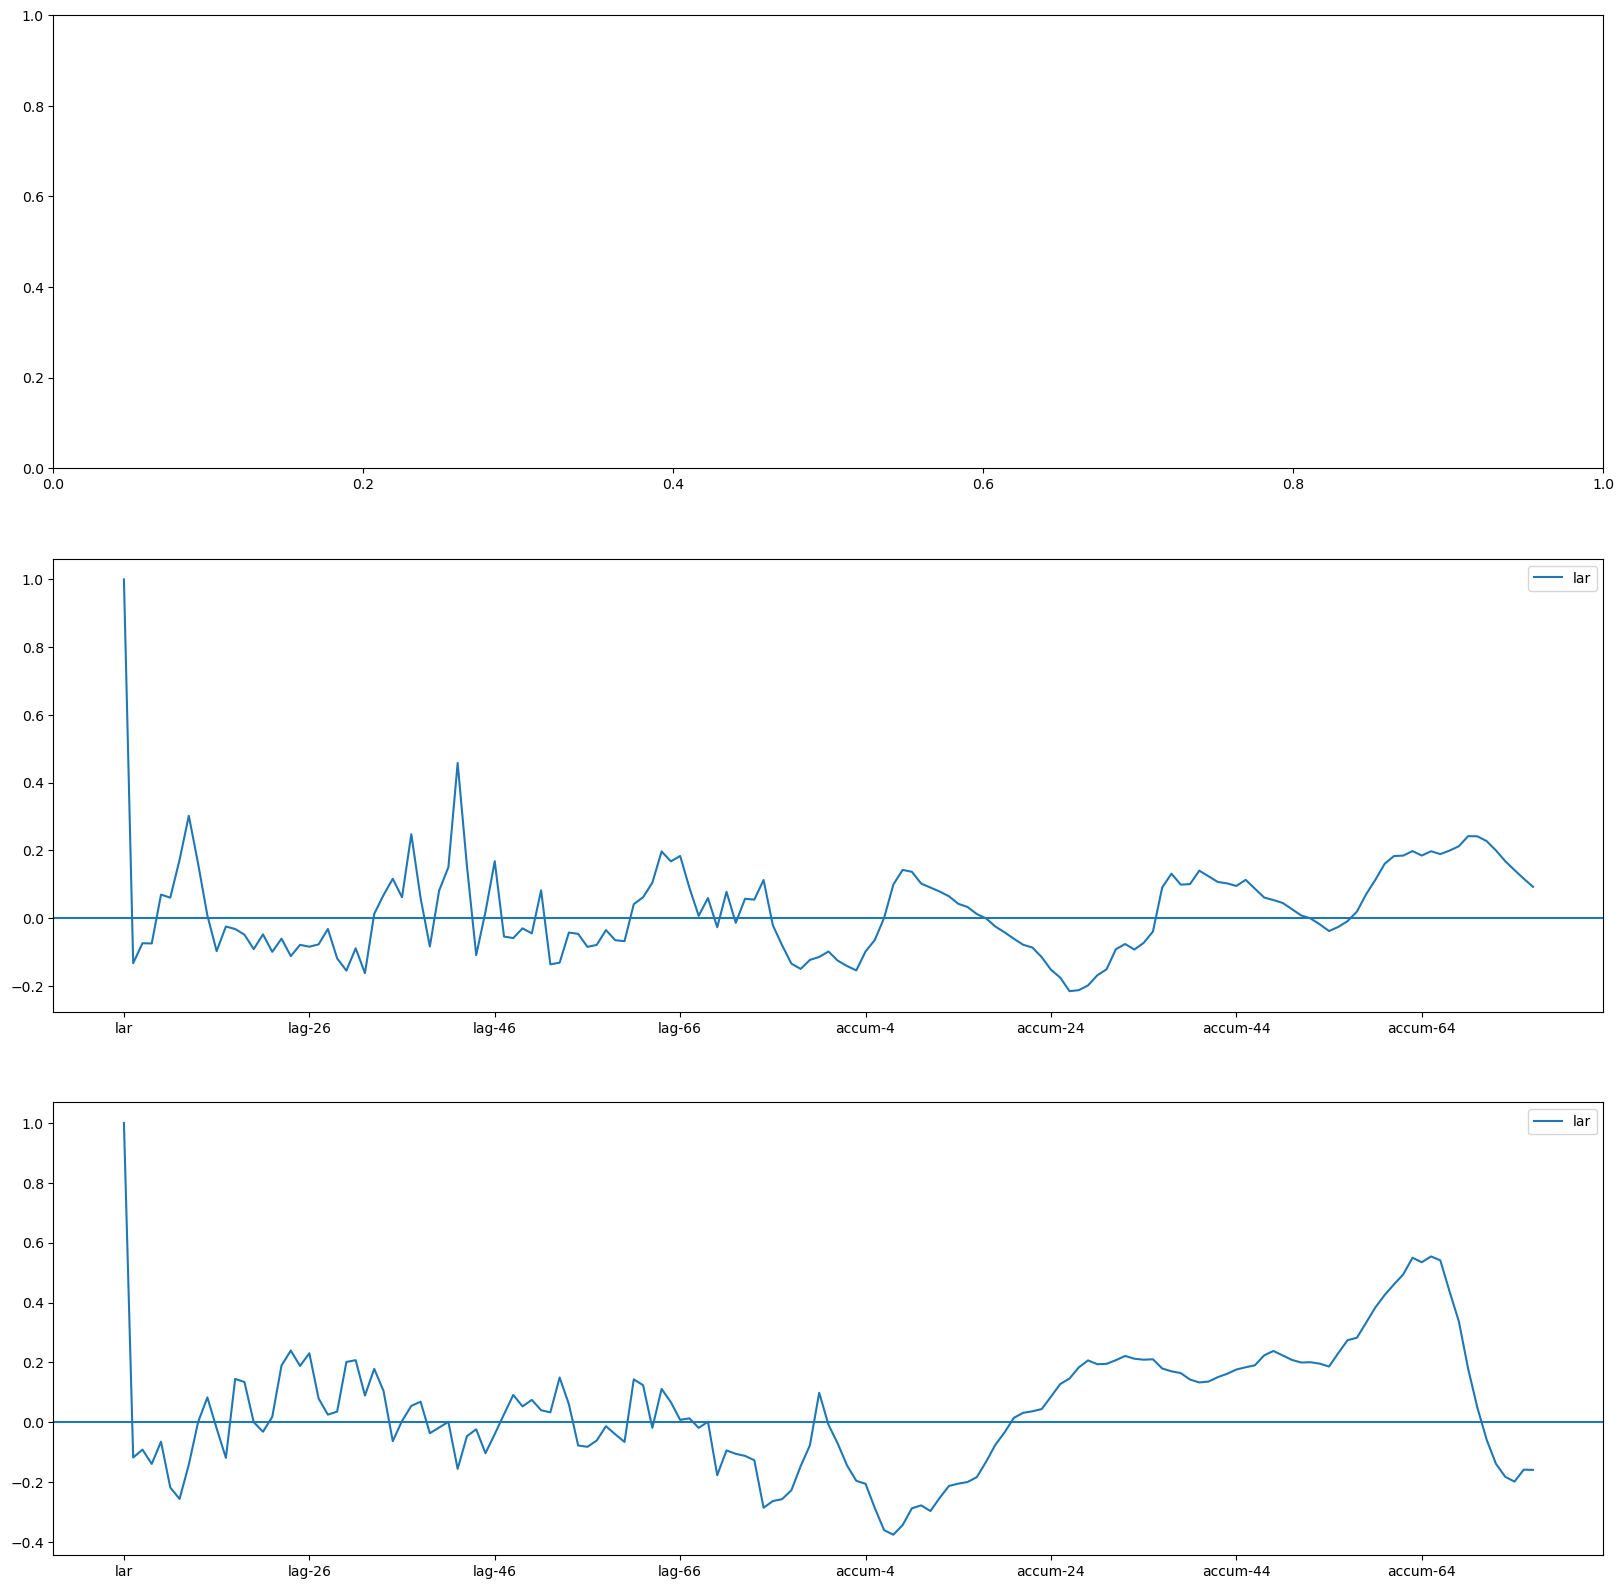

In [8]:
r03 = monthly(2003,rain,7,84)
r04 = monthly(2004,rain,7,84)
r05 = monthly(2005,rain,7,84)

set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()


/tmp/ipykernel_196495/662922437.py:28: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(may.corr(method='spearman')[['lar']],annot=True,ax=axs[0],vmin=-0.5,cbar=False)


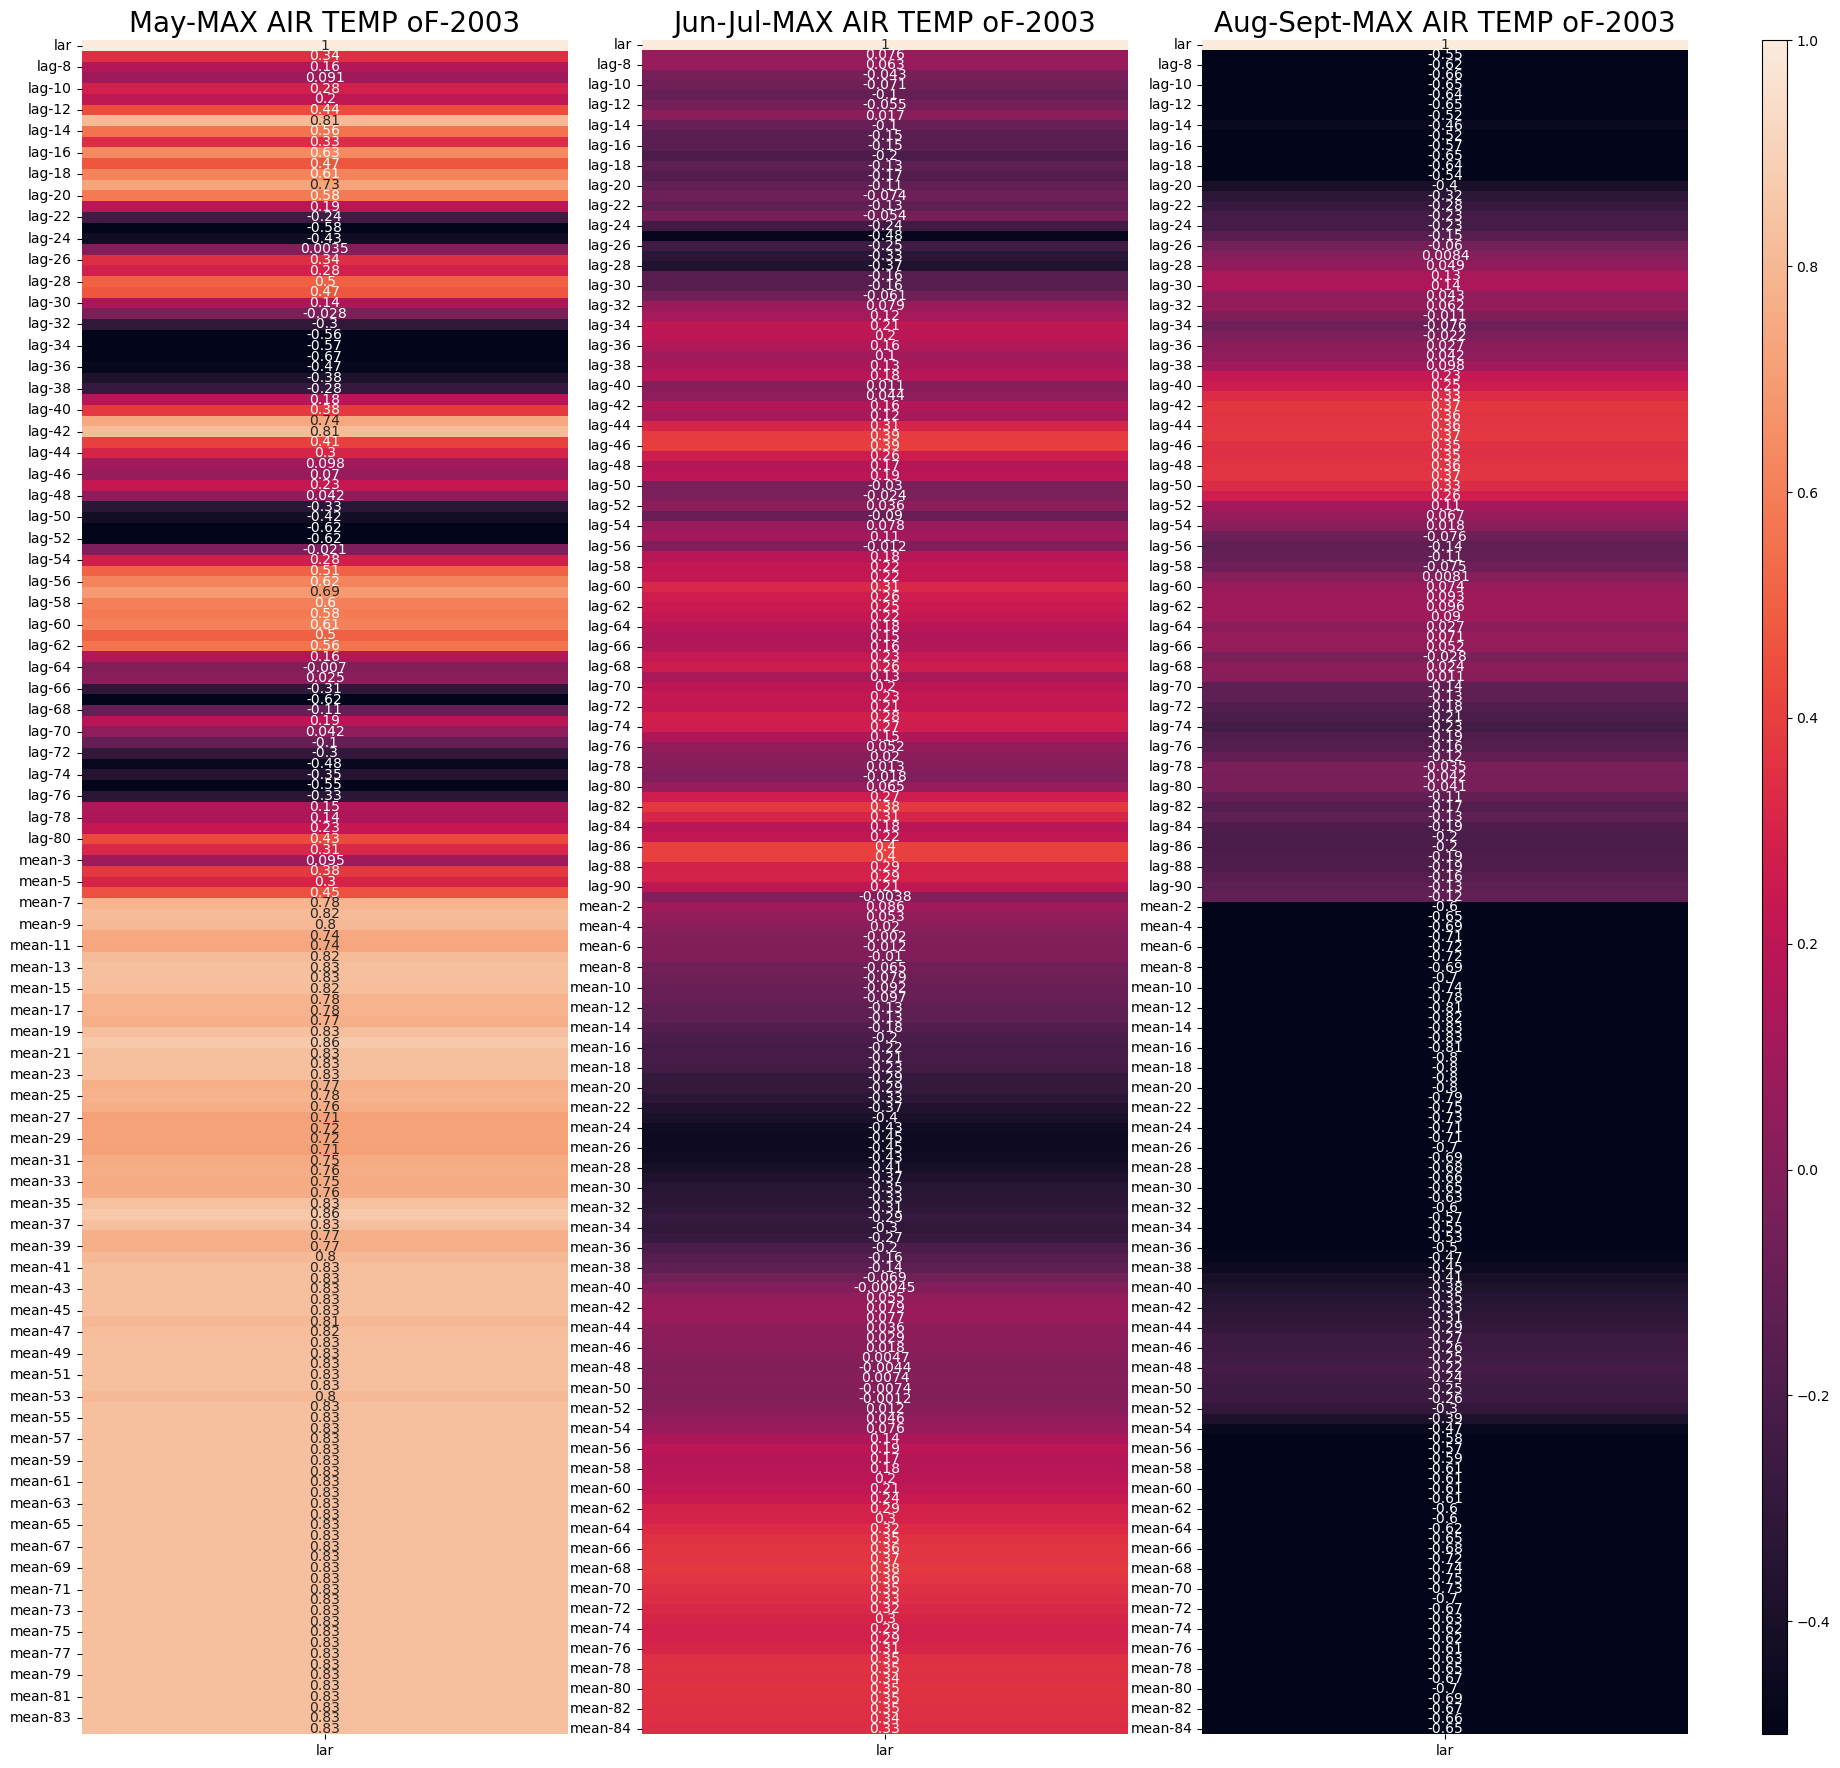

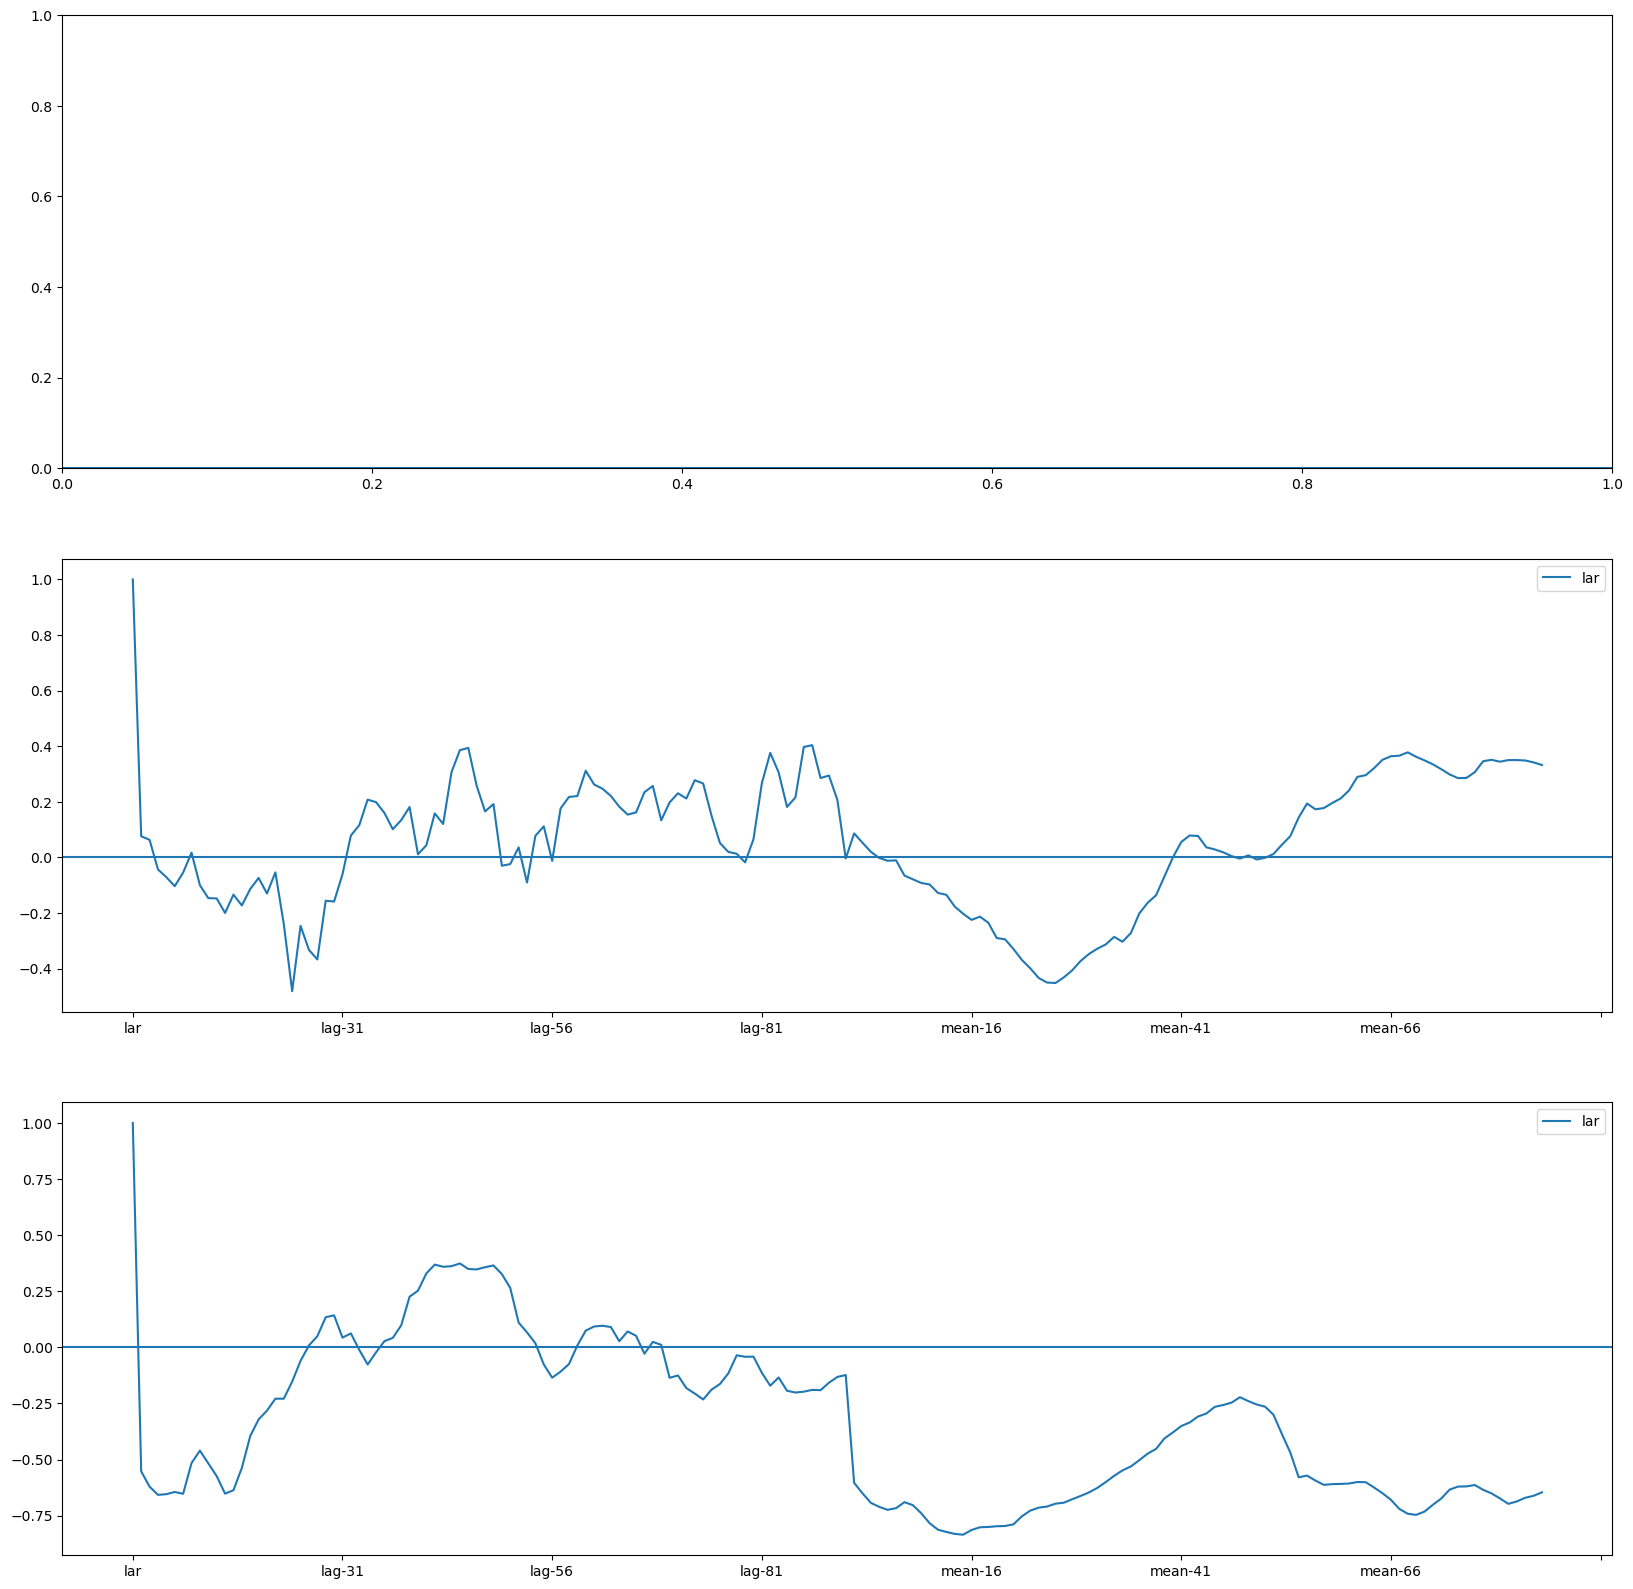

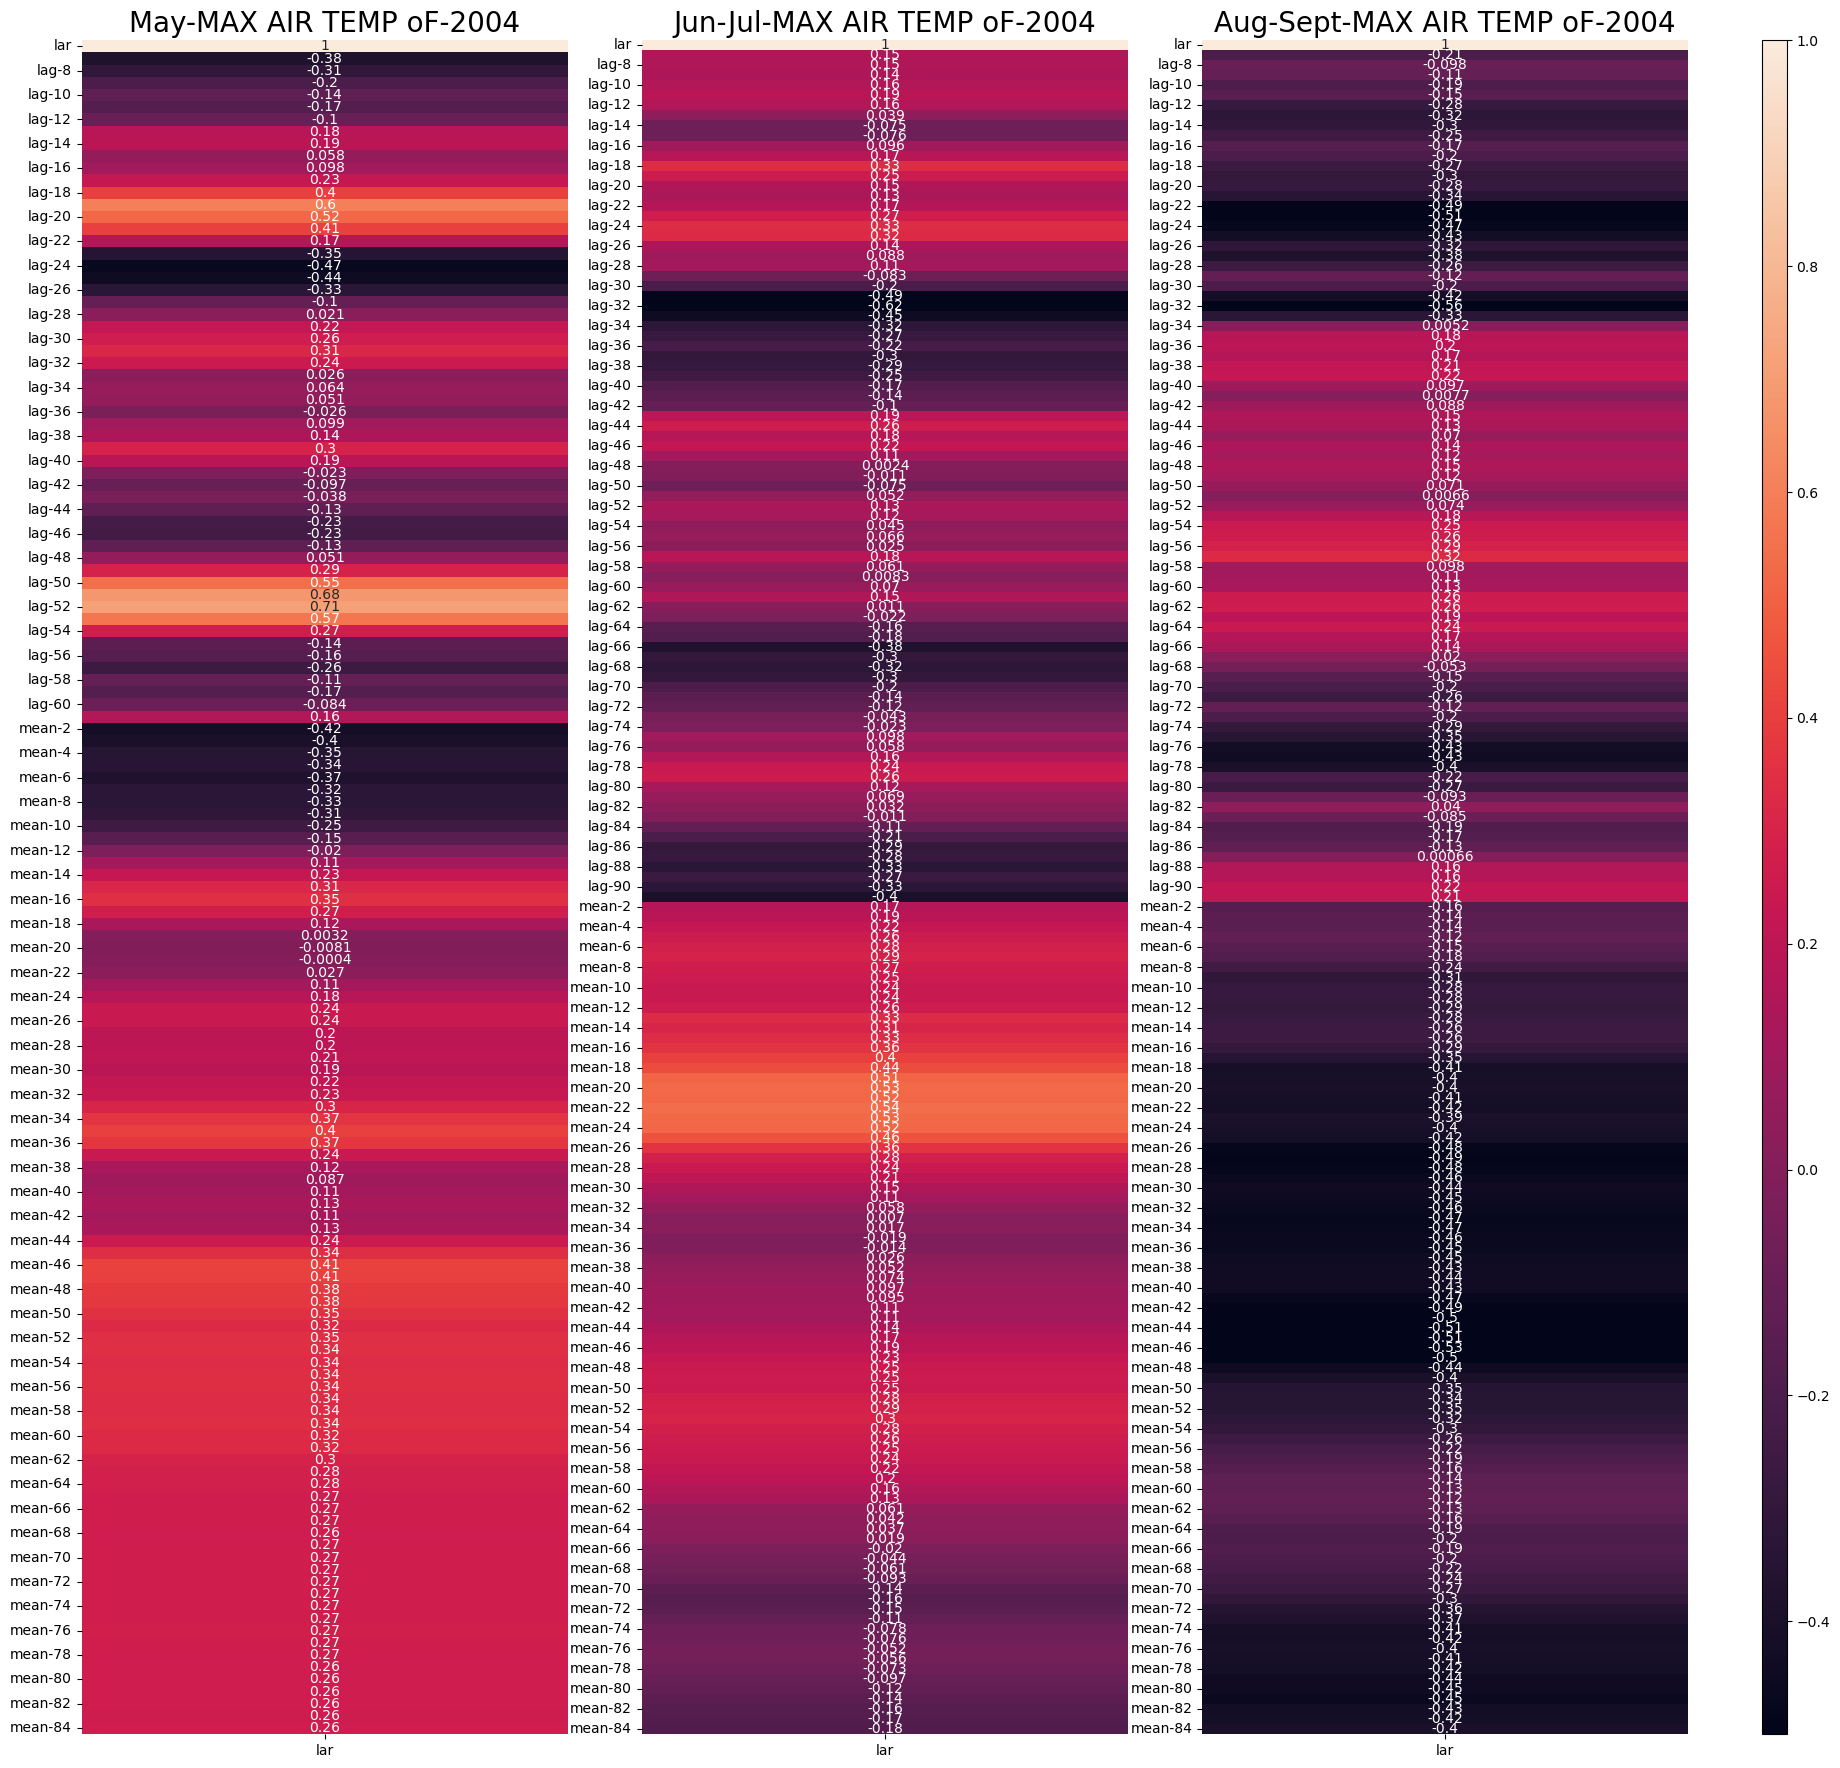

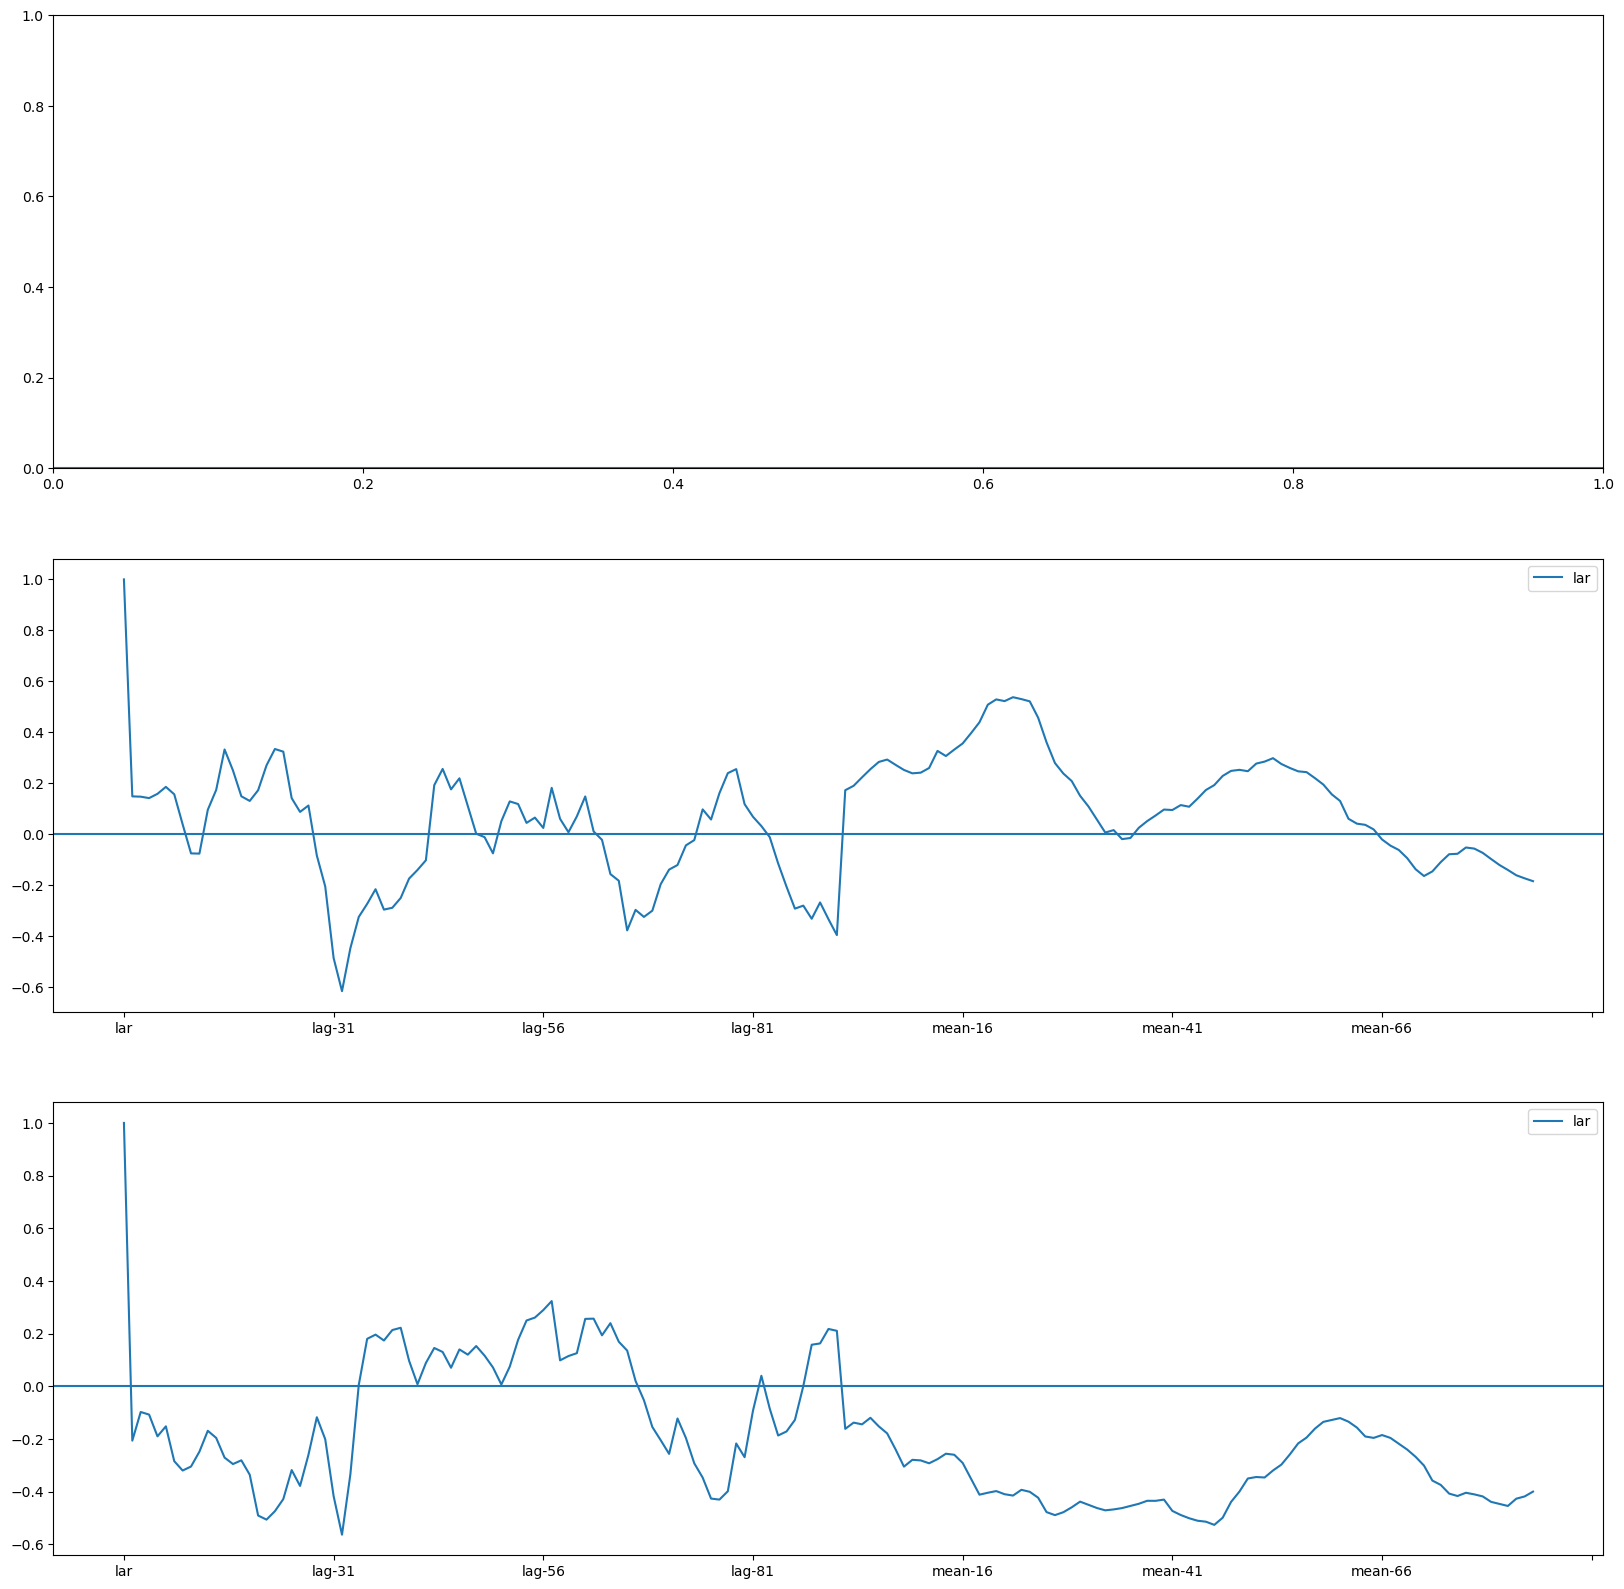

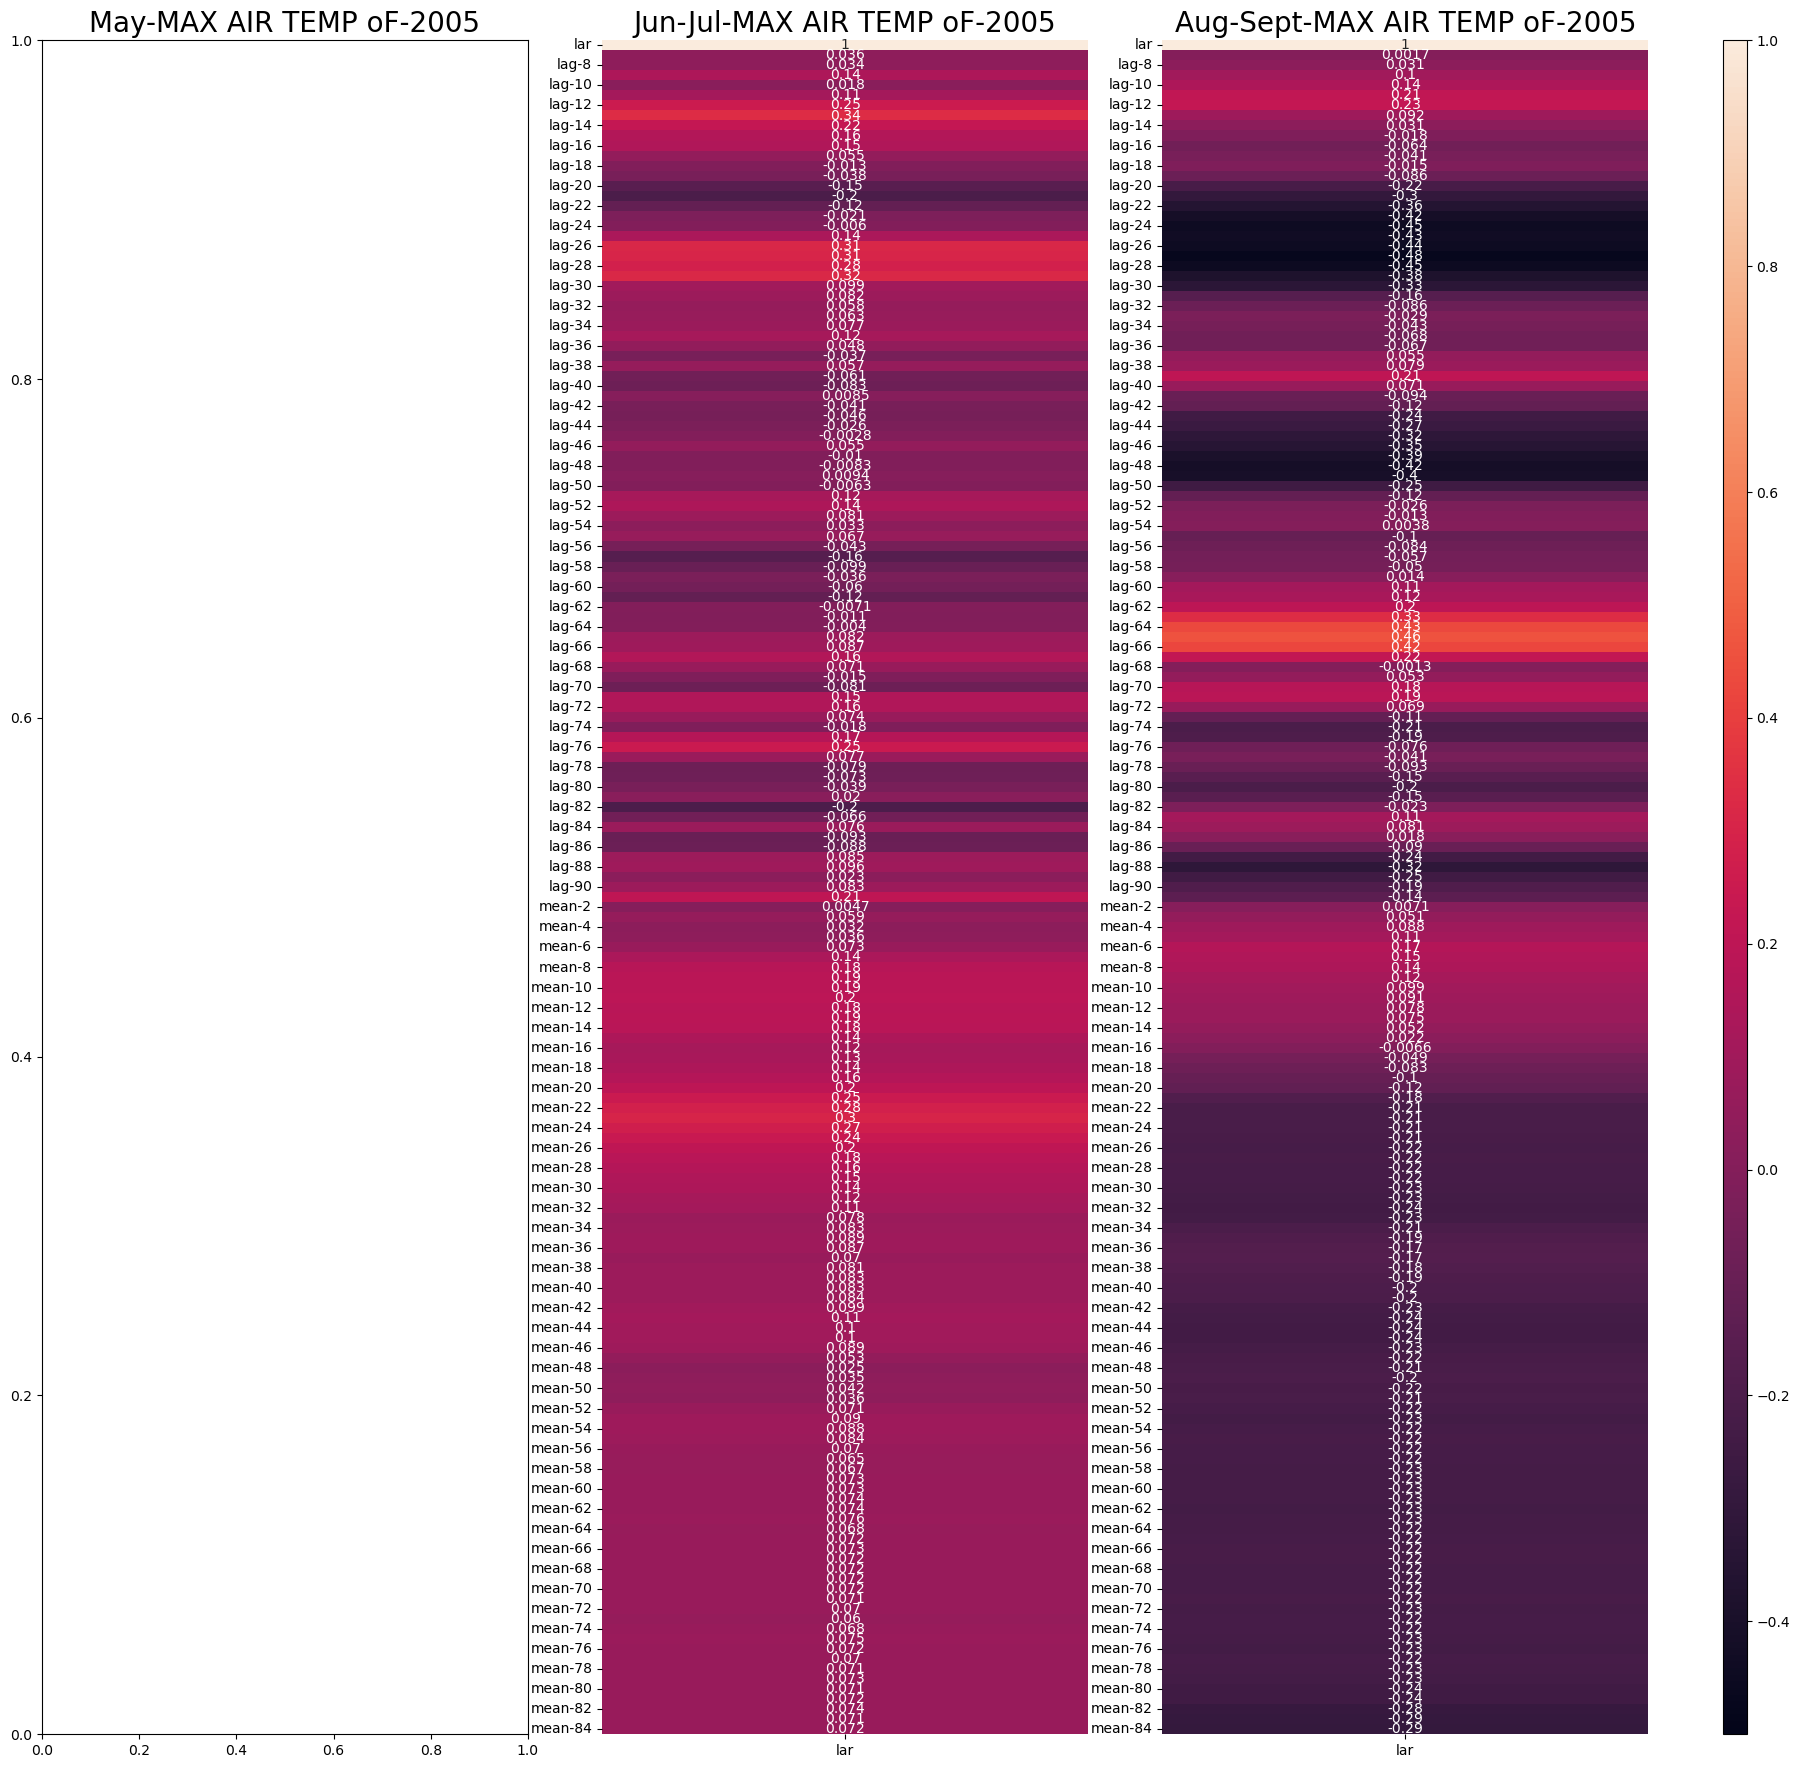

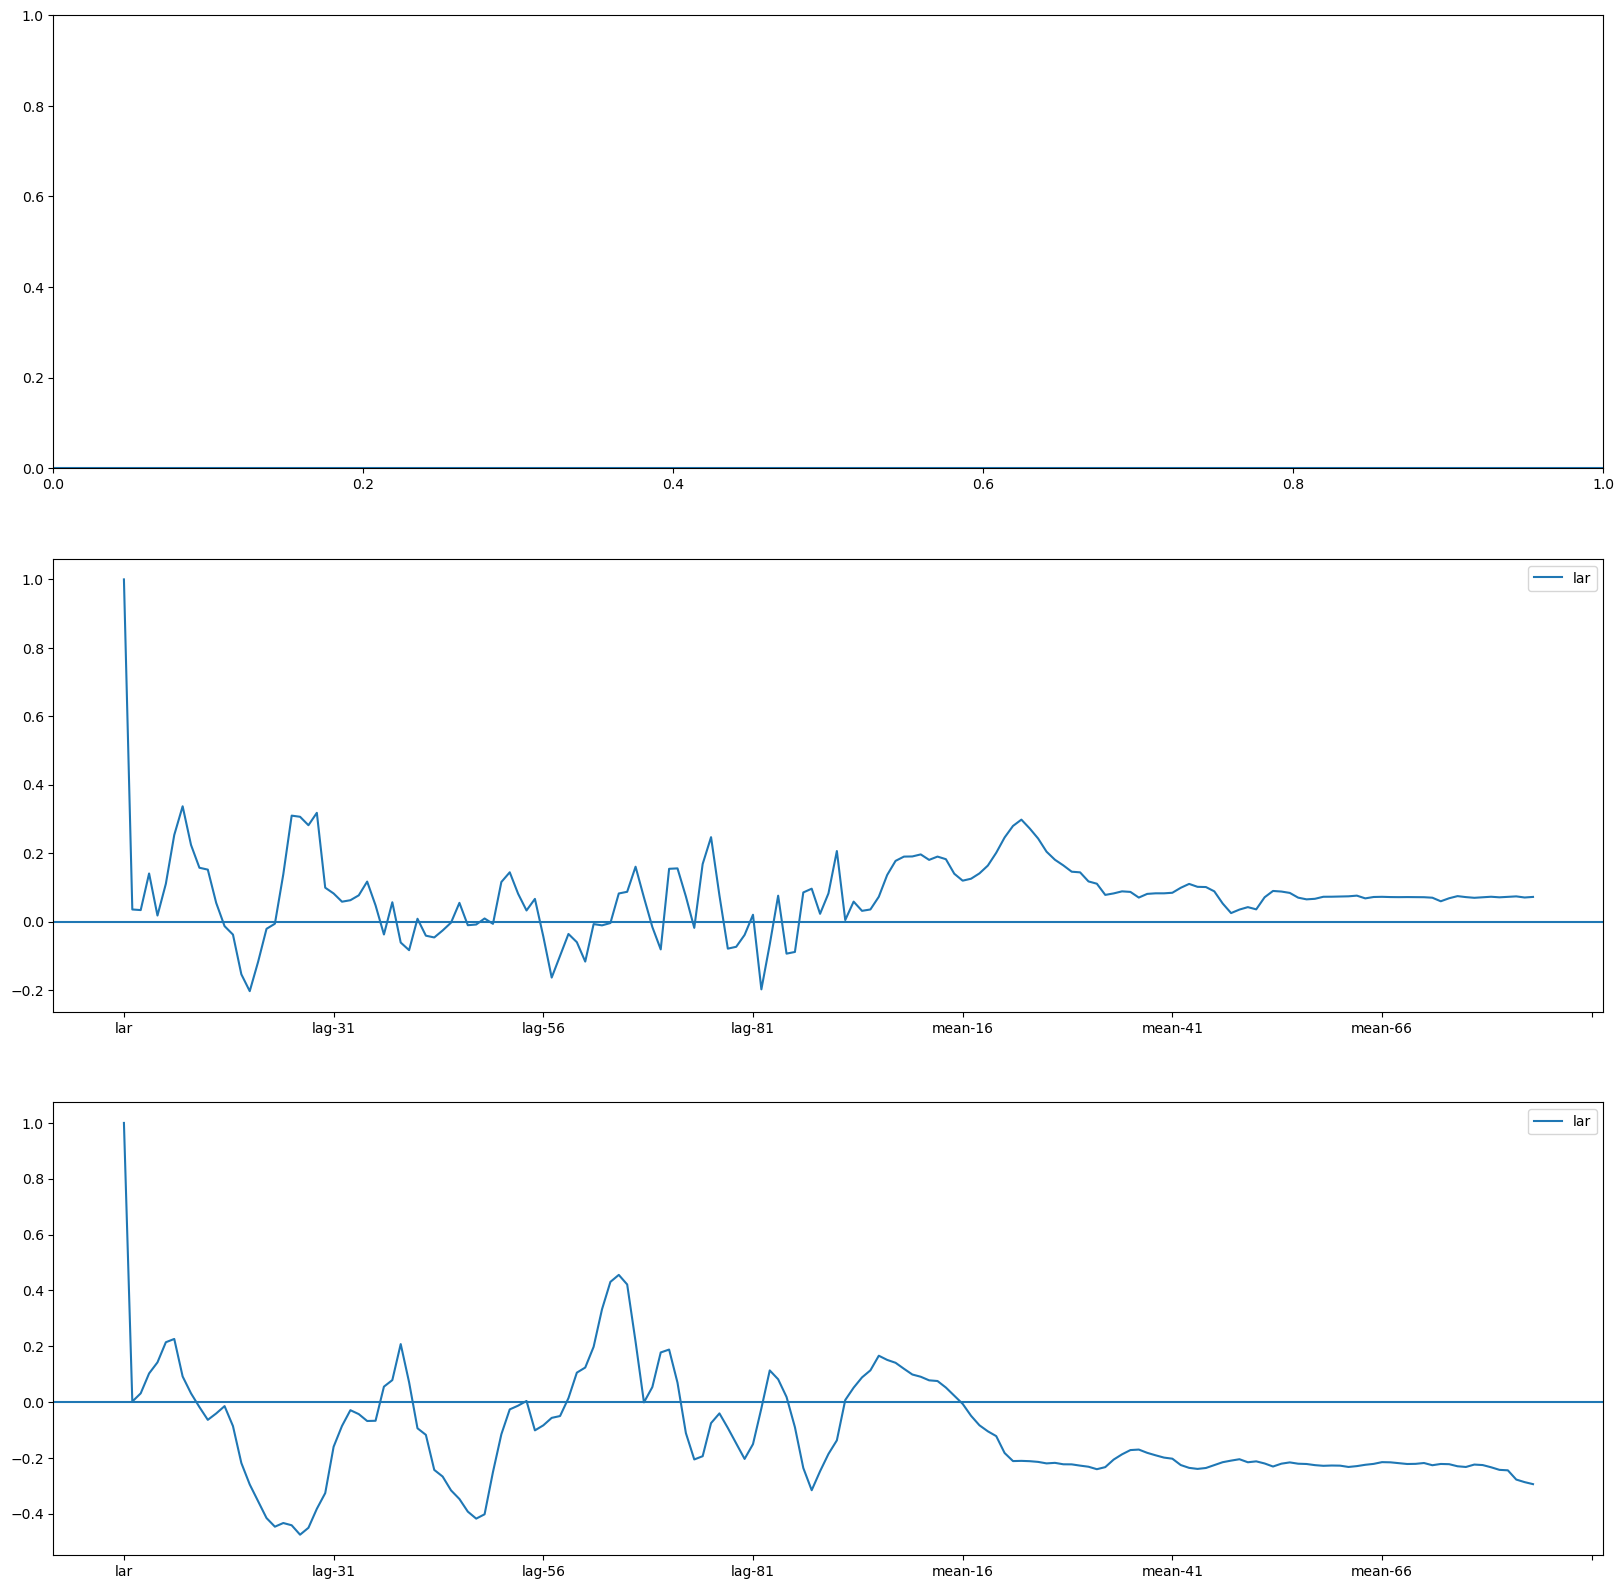

In [11]:
t03 = monthlytemp(2003,temp,'MAX AIR TEMP oF',7,92)
t04 = monthlytemp(2004,temp,'MAX AIR TEMP oF',7,92)
t05 = monthlytemp(2005,temp,'MAX AIR TEMP oF',7,92)
# t06=monthlytemp(2006,temp,'MAX AIR TEMP oF',7,92)

In [10]:
# r06=monthly(2006,rain,7,92)

In [10]:
rtjj03 = [t03[0][t03[0].columns[i]]*t03[0].corr(method='spearman')[['lar']].iloc[i].values+ r03[1][r03[1].columns[i]]*r03[1].corr(method='spearman')[['lar']].iloc[i].values for i in range(92,len(r03[1].columns))]
rtjj04 = [t04[0][t04[0].columns[i]]*t04[0].corr(method='spearman')[['lar']].iloc[i].values+ r04[1][r04[1].columns[i]]*r04[1].corr(method='spearman')[['lar']].iloc[i].values for i in range(92,len(r04[1].columns))]
rtjj05 = [t05[0][t05[0].columns[i]]*t05[0].corr(method='spearman')[['lar']].iloc[i].values+ r05[1][r05[1].columns[i]]*r05[1].corr(method='spearman')[['lar']].iloc[i].values for i in range(92,len(r05[1].columns))]
# rtjj06 = [t06[0][t06[0].columns[i]]*t06[0].corr(method='spearman')[['lar']].iloc[i].values+ r06[1][r06[1].columns[i]]*r06[1].corr(method='spearman')[['lar']].iloc[i].values for i in range(92,len(r06[1].columns))]

rtas03 = [t03[1][t03[1].columns[i]]*t03[1].corr(method='spearman')[['lar']].iloc[i].values+ r03[2][r03[2].columns[i]]*r03[2].corr(method='spearman')[['lar']].iloc[i].values for i in range(92,len(r03[2].columns))]
rtas04 = [t04[1][t04[1].columns[i]]*t04[1].corr(method='spearman')[['lar']].iloc[i].values+ r04[2][r04[2].columns[i]]*r04[2].corr(method='spearman')[['lar']].iloc[i].values for i in range(92,len(r04[2].columns))]
rtas05 = [t05[1][t05[1].columns[i]]*t05[1].corr(method='spearman')[['lar']].iloc[i].values+ r05[2][r05[2].columns[i]]*r05[2].corr(method='spearman')[['lar']].iloc[i].values for i in range(92,len(r05[2].columns))]
# rtas06 = [t06[1][t06[1].columns[i]]*t06[1].corr(method='spearman')[['lar']].iloc[i].values+ r06[2][r06[2].columns[i]]*r06[2].corr(method='spearman')[['lar']].iloc[i].values for i in range(92,len(r06[2].columns))]


In [9]:
df03 = r03[1].append(r03[2])
df04 = r04[1].append(r04[2])
df05 = r05[1].append(r05[2])
# df06 = pd.concat(rtjj06,axis=1).append(pd.concat(rtas06,axis=1))

/tmp/ipykernel_196495/434504620.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df03 = r03[1].append(r03[2])
/tmp/ipykernel_196495/434504620.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df04 = r04[1].append(r04[2])
/tmp/ipykernel_196495/434504620.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df05 = r05[1].append(r05[2])


In [15]:
np.log(t03[0]['lar'].values)+1

array([4.80666249, 5.53259949, 2.38629436, 2.09861229, 6.95324333,
       6.84643878, 5.88280192, 6.90808294, 5.69134788, 6.71373281,
       6.32787617, 4.66356165, 6.40717177, 6.22574667, 6.18178355,
       6.18738581, 6.47646355, 7.15909539, 6.20400669, 5.00733319,
       6.22035583, 6.24702407, 5.92725369, 6.17614973, 5.88280192,
       5.53259949, 5.75359019, 5.33073334, 5.81218436, 5.81218436,
       6.79909265, 6.50533154, 6.84932478, 5.77068462, 5.48863637,
       5.82831374, 5.93447393, 5.82028157, 5.72738782, 2.94591015,
       5.51085951, 5.53259949, 5.89034913, 6.33271879, 5.17438727,
       5.75359019, 5.91265489, 3.99573227, 5.6443909 , 5.34380542,
       4.4339872 , 5.55387689, 4.97029191, 4.52636052, 5.20469262,
       5.18965474, 5.00733319, 5.8978398 , 5.82028157, 5.55387689,
       5.41884061])

In [12]:
df03['lar']=[*np.log(t03[0]['lar'].values+1),*np.log(t03[1]['lar'].values+1)]
df04['lar']=[*np.log(t04[0]['lar'].values+1),*np.log(t04[1]['lar'].values+1)]
df05['lar']=[*np.log(t05[0]['lar'].values+1),*np.log(t05[1]['lar'].values+1)]
# df06['lar']=[*t06[0]['lar'].values,*t06[1]['lar'].values]

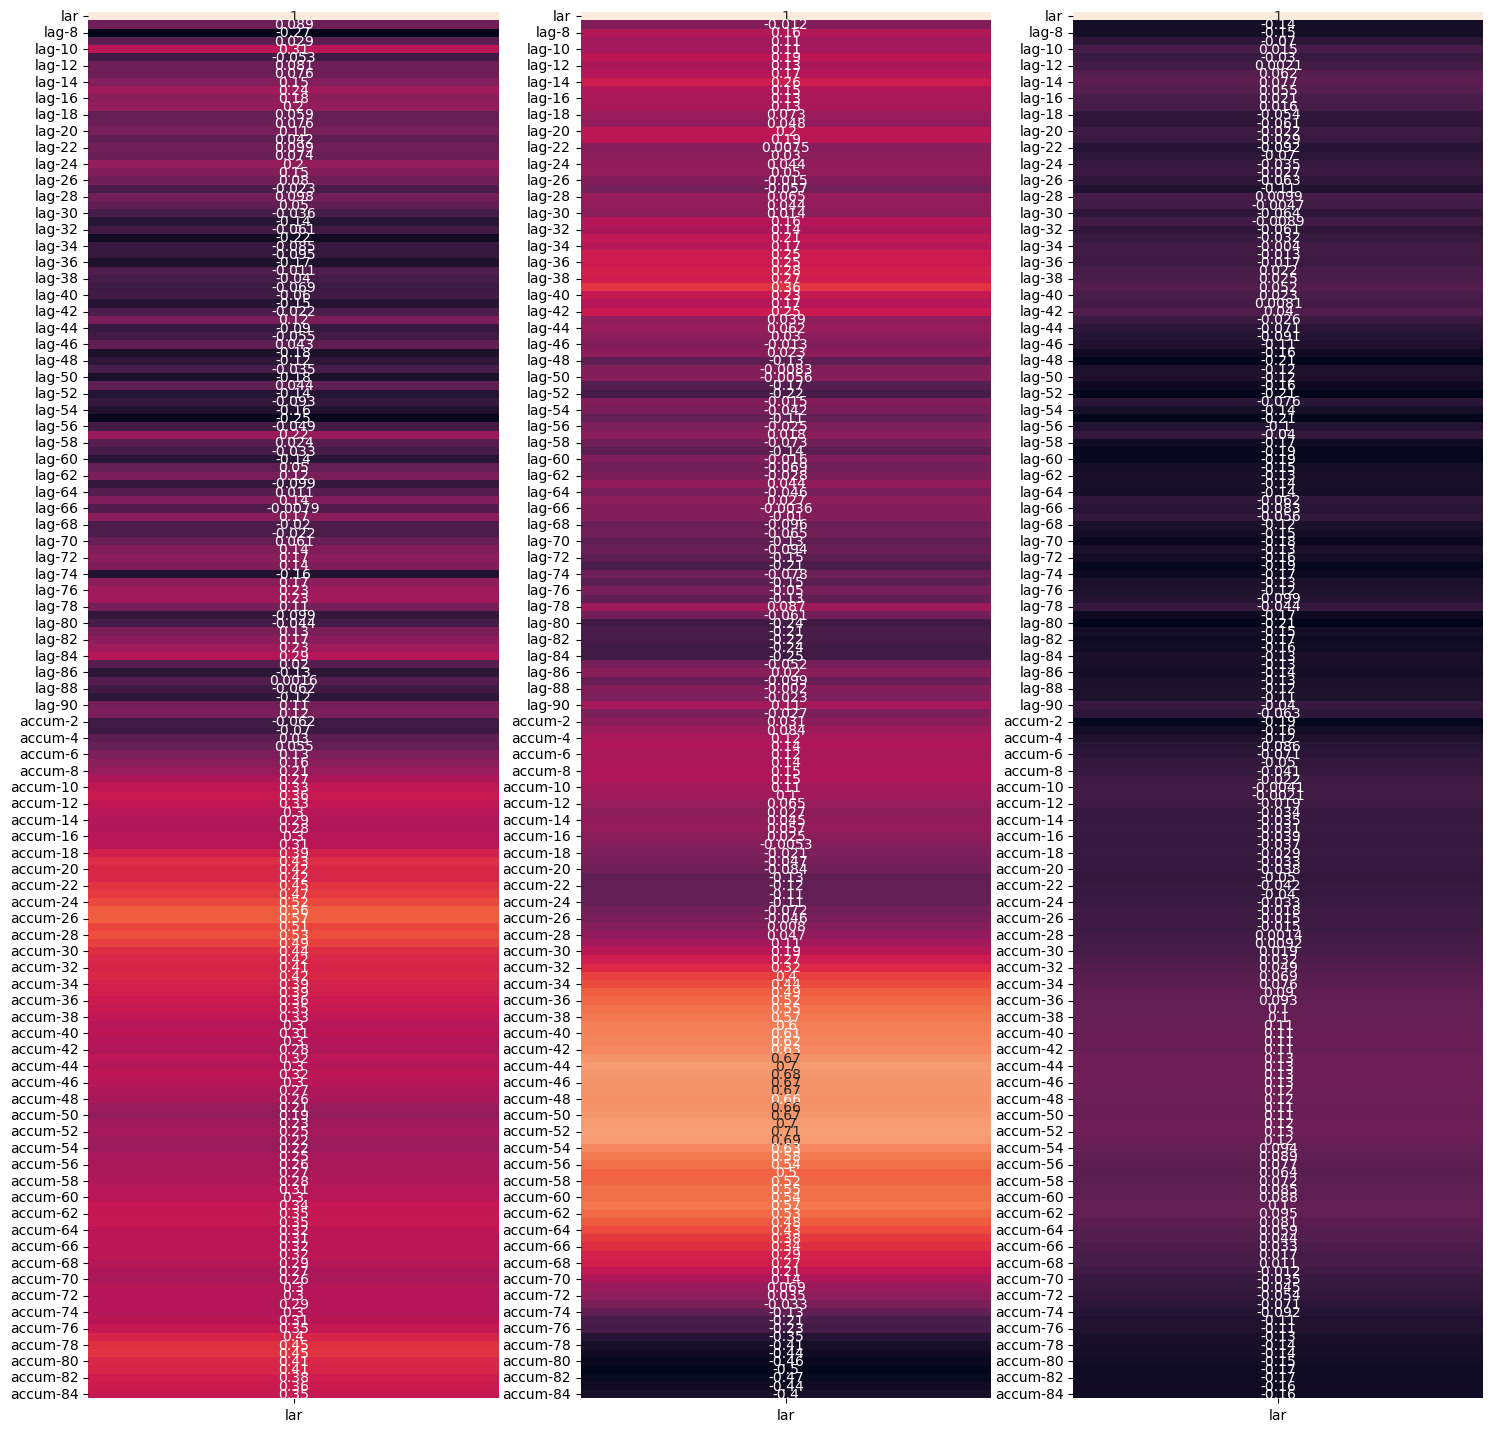

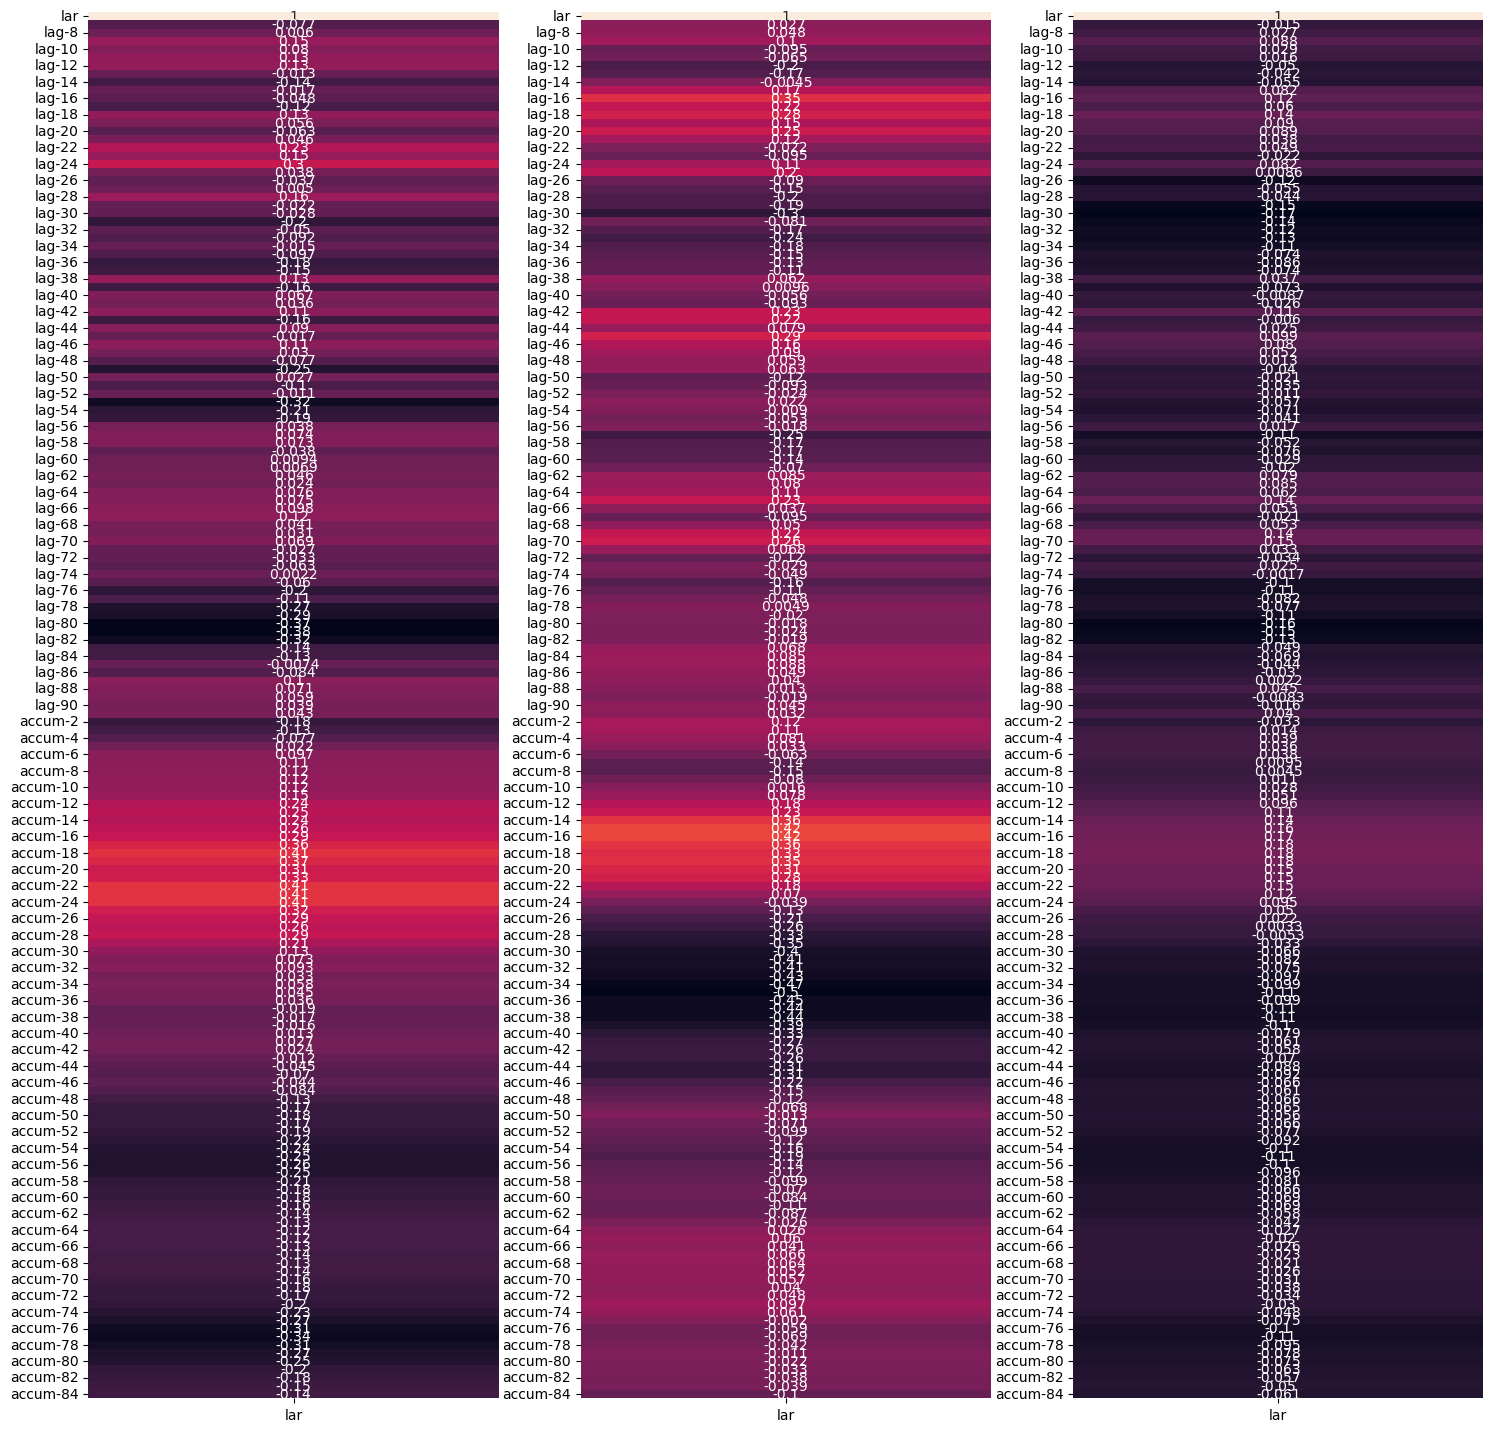

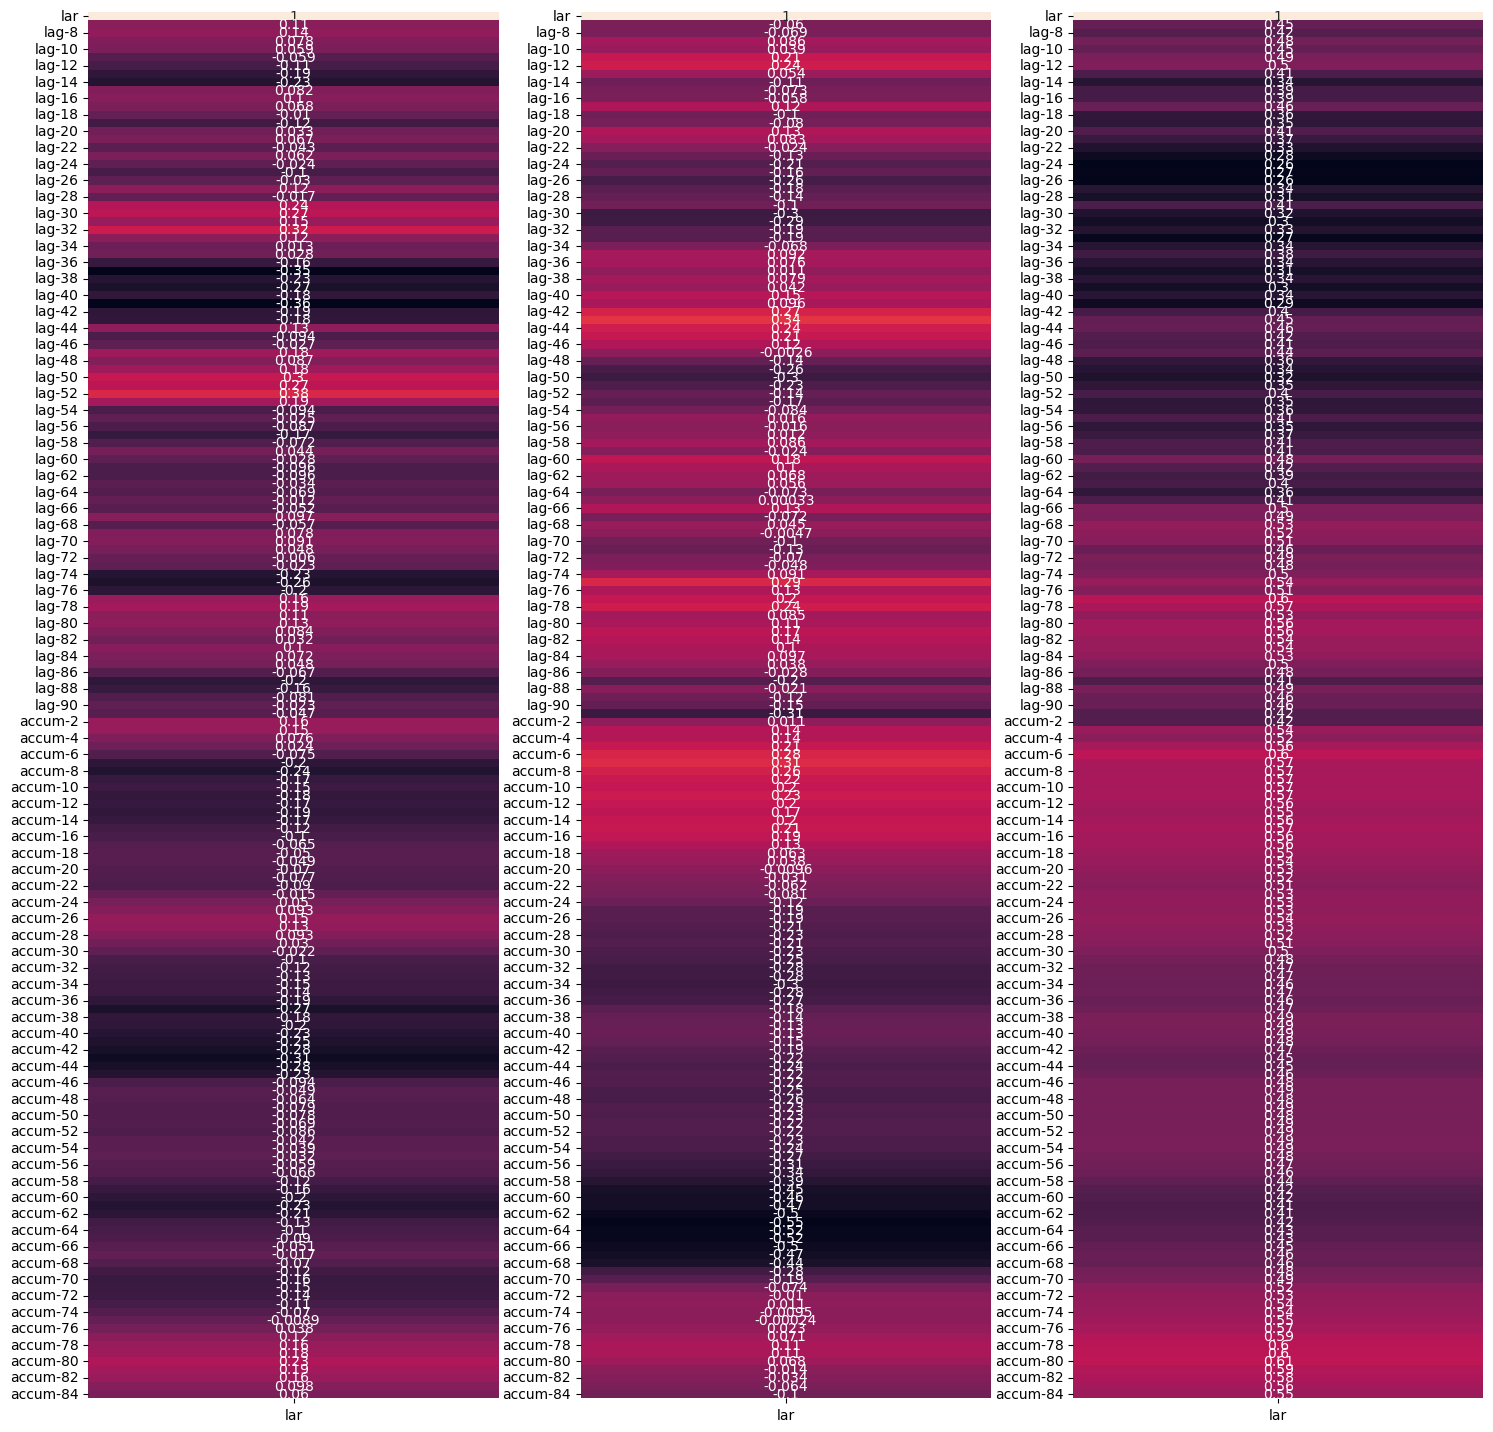

In [17]:
for i in [df03,df04,df05]:
    fig, axs = plt.subplots(ncols=3, gridspec_kw=dict(width_ratios=[1,1,1]),figsize=(18,18))
    sns.heatmap(i.iloc[:61].corr(method='spearman')[['lar']],annot=True,ax=axs[0],cbar=False)
    sns.heatmap(i.iloc[61:].corr(method='spearman')[['lar']],annot=True,ax=axs[1],cbar=False)
    sns.heatmap(i.corr(method='spearman')[['lar']],annot=True,ax=axs[2],cbar=False)

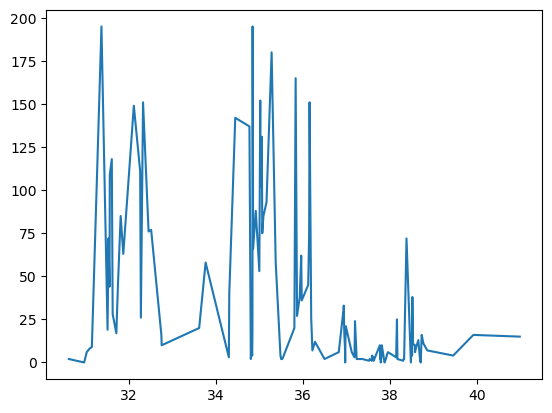

In [23]:
df05 = df05.sort_values(by=73)
plt.plot(df05[73],df05['lar'])

# Trial model fitting

In [13]:
rainall03 =df04.iloc[61:].append(df05.iloc[61:])
rainall04 =  df03.iloc[61:].append(df05.iloc[61:])
rainall05 = df03.iloc[61:].append(df04.iloc[61:])
rainall = df03.iloc[61:].append(df04.iloc[61:].append(df05.iloc[61:]))

/tmp/ipykernel_196495/964059072.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rainall03 =df04.iloc[61:].append(df05.iloc[61:])
/tmp/ipykernel_196495/964059072.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rainall04 =  df03.iloc[61:].append(df05.iloc[61:])
/tmp/ipykernel_196495/964059072.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rainall05 = df03.iloc[61:].append(df04.iloc[61:])
/tmp/ipykernel_196495/964059072.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rainall = df03.iloc[61:].append(df04.iloc[61:].append(df05.iloc[61:]))
/tmp/ipykernel_196495/964059072.py:4: FutureWarning: The frame.append method is depreca

In [74]:
###Leave one out model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.ensemble import GradientBoostingRegressor

cv = LeaveOneOut()

#build multiple linear regression model

X = np.array(rainall03.drop('lar',axis=1))
y=np.array(rainall03['lar'])
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
model = GradientBoostingRegressor(**gbr_params)
y_true, y_pred = list(), list()
for train_ix, test_ix in cv.split(X):
    X_train, X_test = X[train_ix, :], X[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]
 # fit model

    model.fit(X_train, y_train)
 # evaluate model
    yhat = model.predict(X_test)
 # store
    y_true.append(y_test[0])
    y_pred.append(yhat[0])
    X_test_preds2 = model.predict(df03.iloc[61:].drop('lar',axis=1))
    print('R^2=', 
        pearsonr(df03.iloc[61:]['lar'],X_test_preds2))
#     plt.scatter(df03['lar'].iloc[61:],X_test_preds2)

/data/keeling/a/pborse2/miniconda39/envs/geonew/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
/data/keeling/a/pborse2/miniconda39/envs/geonew/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/data/keeling/a/pborse2/miniconda39/envs/geonew/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


R^2= PearsonRResult(statistic=-0.08474408581097483, pvalue=0.5161125579219424)


/data/keeling/a/pborse2/miniconda39/envs/geonew/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/data/keeling/a/pborse2/miniconda39/envs/geonew/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


R^2= PearsonRResult(statistic=-0.04791179502924743, pvalue=0.7138634510131372)


/data/keeling/a/pborse2/miniconda39/envs/geonew/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/data/keeling/a/pborse2/miniconda39/envs/geonew/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


R^2= PearsonRResult(statistic=-0.02991039548449386, pvalue=0.8190041751781844)


/data/keeling/a/pborse2/miniconda39/envs/geonew/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/data/keeling/a/pborse2/miniconda39/envs/geonew/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


R^2= PearsonRResult(statistic=-0.008744538136668242, pvalue=0.946672969849698)


/data/keeling/a/pborse2/miniconda39/envs/geonew/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/data/keeling/a/pborse2/miniconda39/envs/geonew/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


R^2= PearsonRResult(statistic=-0.007929785610247389, pvalue=0.9516353564697901)


/data/keeling/a/pborse2/miniconda39/envs/geonew/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/data/keeling/a/pborse2/miniconda39/envs/geonew/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


R^2= PearsonRResult(statistic=-0.02761742576926557, pvalue=0.8326712078613333)


/data/keeling/a/pborse2/miniconda39/envs/geonew/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/data/keeling/a/pborse2/miniconda39/envs/geonew/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


R^2= PearsonRResult(statistic=-0.011619307671310766, pvalue=0.929181059942398)


KeyboardInterrupt: 

In [31]:
df05.iloc[61:]

lar     lag-7     lag-8     lag-9    lag-10    lag-11  \
DATE                                                                     
2005-08-01  3.091042 -0.645998 -0.645998 -0.645998 -0.645998  1.066230   
2005-08-02  3.044522  0.633790 -0.645998 -0.645998 -0.645998 -0.645998   
2005-08-03  3.332205 -0.645998  0.633790 -0.645998 -0.645998 -0.645998   
2005-08-04  3.663562 -0.645998 -0.645998  0.633790 -0.645998 -0.645998   
2005-08-05  4.143135 -0.645998 -0.645998 -0.645998  0.633790 -0.645998   
...              ...       ...       ...       ...       ...       ...   
2005-09-26  2.302585  0.617093 -0.175156 -0.645998 -0.645998  0.597892   
2005-09-27  2.197225 -0.645998  0.617093 -0.175156 -0.645998 -0.645998   
2005-09-28  1.945910 -0.645998 -0.645998  0.617093 -0.175156 -0.645998   
2005-09-29  0.000000 -0.645998 -0.645998 -0.645998  0.617093 -0.175156   
2005-09-30  1.098612  0.420909 -0.645998 -0.645998 -0.645998  0.617093   

              lag-12    lag-13    lag-14    lag-15  ...   accum-67   accum-68  \
DATE                                                ...                         
2005-08-01  0.251440 -0.645998  0.001827 -0.463171  ... -29.483870 -29.297546   
2005-08-02  1.066230  0.251440 -0.645998  0.001827  ... -28.204082 -28.850080   
2005-08-03 -0.645998  1.066230  0.251440 -0.645998  ... -28.204084 -28.850082   
2005-08-04 -0.645998 -0.645998  1.066230  0.251440  ... -28.204082 -28.850080   
2005-08-05 -0.645998 -0.645998 -0.645998  1.066230  ... -28.204084 -28.850082   
...              ...       ...       ...       ...  ...        ...        ...   
2005-09-26 -0.635980  0.488530 -0.645998 -0.645998  ... -27.169735 -27.479298   
2005-09-27  0.597892 -0.635980  0.488530 -0.645998  ... -27.671465 -27.815733   
2005-09-28 -0.645998  0.597892 -0.635980  0.488530  ... -27.671467 -28.317465   
2005-09-29 -0.645998 -0.645998  0.597892 -0.635980  ... -27.854290 -28.317461   
2005-09-30 -0.175156 -0.645998 -0.645998  0.597892  ... -27.435211 -27.433384   

             accum-69   accum-70   accum-71   accum-72   accum-73   accum-74  \
DATE                                                                           
2005-08-01 -29.072821 -29.718819 -30.364817 -31.010815 -31.631767 -32.164230   
2005-08-02 -28.663757 -28.439032 -29.085030 -29.731028 -30.377026 -30.997978   
2005-08-03 -29.496080 -29.309757 -29.085032 -29.731030 -30.377028 -31.023026   
2005-08-04 -29.496078 -30.142076 -29.955753 -29.731028 -30.377026 -31.023024   
2005-08-05 -29.496080 -30.142078 -30.788076 -30.601753 -30.377028 -31.023026   
...               ...        ...        ...        ...        ...        ...   
2005-09-26 -27.530899 -27.334558 -26.202377 -26.848375 -27.494373 -28.140371   
2005-09-27 -28.125296 -28.176897 -27.980556 -26.848375 -27.494373 -28.140371   
2005-09-28 -28.461733 -28.771296 -28.822897 -28.626556 -27.494375 -28.140373   
2005-09-29 -28.963459 -29.107727 -29.417290 -29.468891 -29.272551 -28.140369   
2005-09-30 -27.896555 -28.542553 -28.686821 -28.996384 -29.047985 -28.851645   

             accum-75   accum-76  
DATE                              
2005-08-01 -32.810230 -33.172386  
2005-08-02 -31.530439 -32.176437  
2005-08-03 -31.643978 -32.176441  
2005-08-04 -31.669022 -32.289974  
2005-08-05 -31.669024 -32.315022  
...               ...        ...  
2005-09-26 -28.786369 -29.432367  
2005-09-27 -28.786369 -29.432367  
2005-09-28 -28.786371 -29.432369  
2005-09-29 -28.786367 -29.432365  
2005-09-30 -27.719463 -28.365461  

[61 rows x 153 columns]

R^2= PearsonRResult(statistic=0.7409385110692531, pvalue=2.271902438806557e-05)
RMSE= 1.1572671904471423


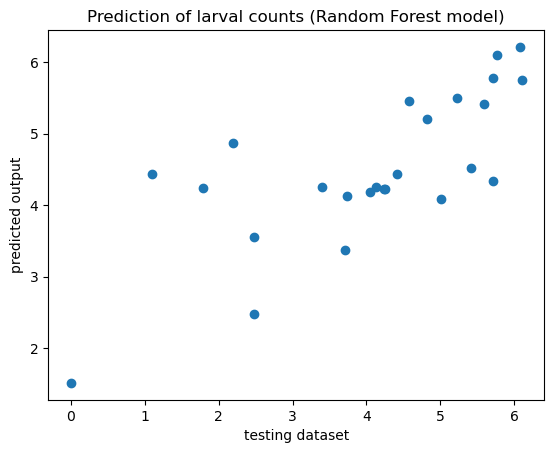

In [29]:
## Consider columns 10-31 for jun-jul and columns 25-61 for aug-sept
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(rainall05[rainall05.columns[86:]]),
                                                    np.array(rainall05['lar']),
                                                    test_size=0.2,
                                                    random_state=0)
from sklearn.ensemble import RandomForestRegressor
# from sklearn.linear_model import LinearRegression
import math
import sklearn.metrics 
model2 = RandomForestRegressor()
# gbr_params = {'n_estimators': 1000,
#           'max_depth': 3,
#           'min_samples_split': 5,
#           'learning_rate': 0.01,
#           'loss': 'ls'}
# model = GradientBoostingRegressor(**gbr_params)
model2.fit(X_train, y_train)

# let's get the predictions
X_test_preds1 = model2.predict(X_test)

print('R^2=', 
        pearsonr(y_test,X_test_preds1))
print('RMSE=',
        math.sqrt(sklearn.metrics.mean_squared_error(X_test_preds1,y_test)))
plt.scatter(y_test, X_test_preds1);
plt.xlabel('testing dataset')
plt.ylabel('predicted output')
plt.title('Prediction of larval counts (Random Forest model)')
y_test = pd.DataFrame(y_test)
y_test.columns=['testing data']
y_test['pred'] = X_test_preds1

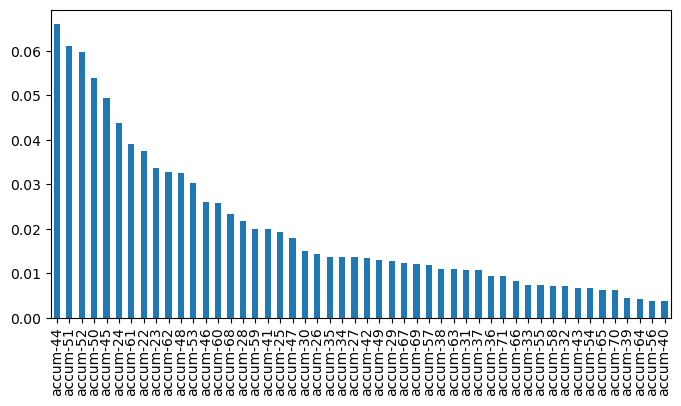

In [63]:
importance = pd.Series(model2.feature_importances_)
importance.index = [*rainall05.columns[106:156]]
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(8,4))
plt.show()

              testing data      pred
testing data      1.000000  0.847814
pred              0.847814  1.000000
RMSE= 81.23629775369673


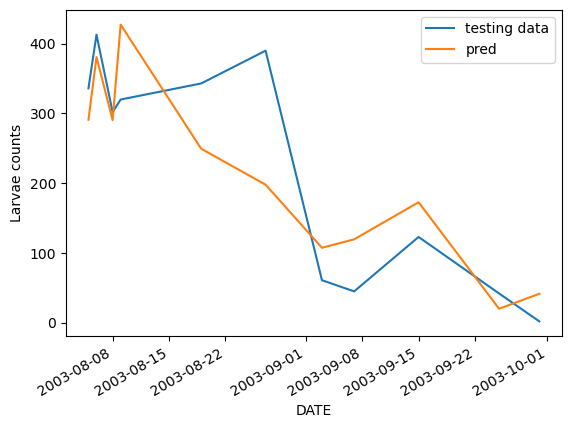

              testing data      pred
testing data      1.000000  0.708615
pred              0.708615  1.000000
RMSE= 33.58891568870387


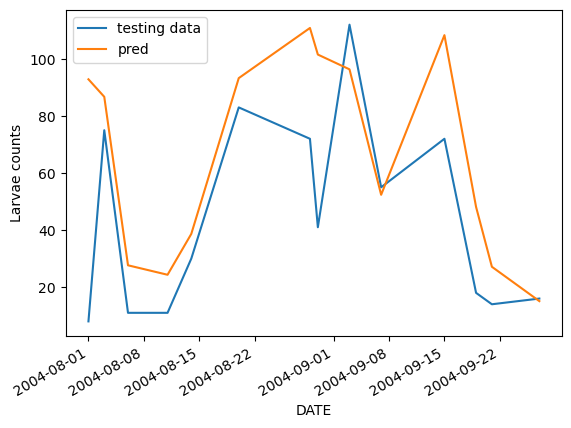

              testing data      pred
testing data      1.000000  0.881912
pred              0.881912  1.000000
RMSE= 28.934194303626292


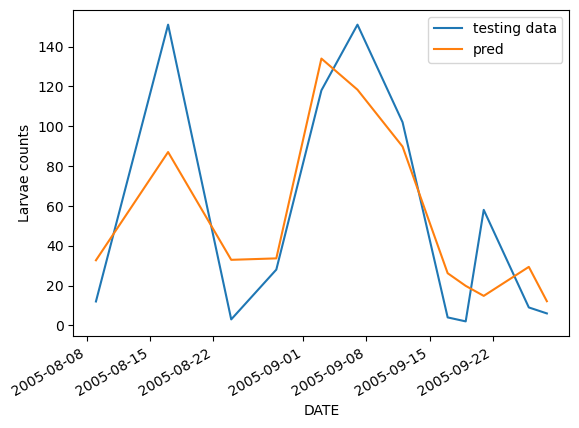

Text(0, 0.5, 'Larvae counts')

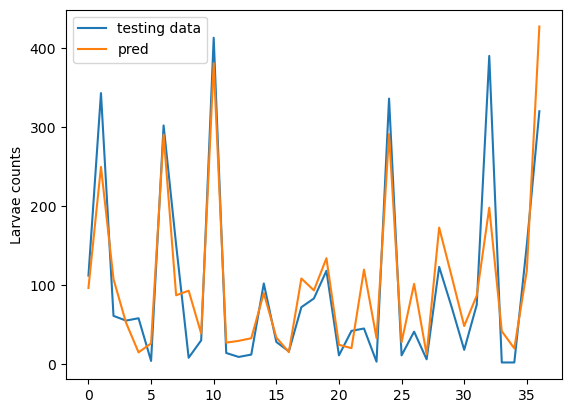

In [19]:
for i in range(2003,2006):
    y_test[y_test.index.year==i].plot(ylabel = 'Larvae counts')
    print(y_test[y_test.index.year==i].corr())
    print('RMSE=',
        math.sqrt(sklearn.metrics.mean_squared_error(y_test[y_test.index.year==i]['testing data'],y_test[y_test.index.year==i]['pred'])))
    plt.show()
plt.plot(y_test['testing data'].values)
plt.plot(y_test['pred'].values)
plt.legend(['testing data', 'pred'])
plt.ylabel('Larvae counts')

R^2= PearsonRResult(statistic=-0.04498362684644484, pvalue=0.7306662807099972)


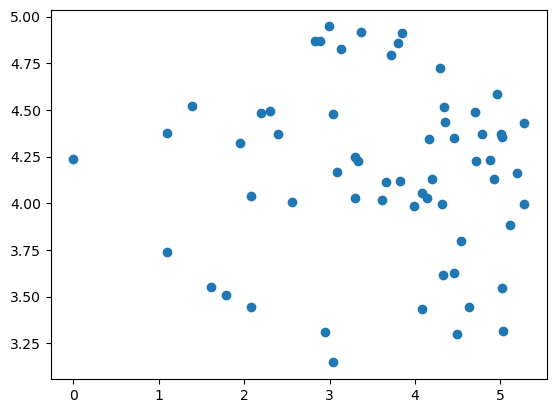

In [30]:
X_test_preds2 = model2.predict(np.array(df05.iloc[61:][df05.columns[86:]]))
print('R^2=', 
        pearsonr(df05.iloc[61:]['lar'],X_test_preds2))
plt.scatter(df05['lar'].iloc[61:],X_test_preds2)

In [79]:
df04.iloc[61:]

lar      lag-7      lag-8      lag-9     lag-10     lag-11  \
DATE                                                                          
2004-08-01  2.197225 -34.039379 -32.228802 -34.171860 -27.989403 -34.171860   
2004-08-02  4.521789 -34.171860 -34.039379 -32.228802 -34.171860 -27.989403   
2004-08-03  4.330733 -34.171860 -34.171860 -34.039379 -32.228802 -34.171860   
2004-08-04  3.433987 -34.171860 -34.171860 -34.171860 -34.039379 -32.228802   
2004-08-05  4.025352 -13.107340 -34.171860 -34.171860 -34.171860 -34.039379   
...              ...        ...        ...        ...        ...        ...   
2004-09-26  2.708050 -34.171860 -34.171860 -34.171860 -34.039379 -31.301434   
2004-09-27  2.833213 -34.171860 -34.171860 -34.171860 -34.171860 -34.039379   
2004-09-28  2.302585 -34.171860 -34.171860 -34.171860 -34.171860 -34.171860   
2004-09-29  0.000000 -34.171860 -34.171860 -34.171860 -34.171860 -34.171860   
2004-09-30  0.000000 -34.171860 -34.171860 -34.171860 -34.171860 -34.171860   

               lag-12     lag-13     lag-14     lag-15  ...     accum-75  \
DATE                                                    ...                
2004-08-01 -34.171860 -34.171860 -34.171860 -25.030653  ... -1057.681641   
2004-08-02 -34.171860 -34.171860 -34.171860 -34.171860  ... -1088.947266   
2004-08-03 -27.989403 -34.171860 -34.171860 -34.171860  ... -1152.494141   
2004-08-04 -34.171860 -27.989403 -34.171860 -34.171860  ... -1201.512207   
2004-08-05 -32.228802 -34.171860 -27.989403 -34.171860  ... -1180.447754   
...               ...        ...        ...        ...  ...          ...   
2004-09-26  65.630692 -34.171860 -34.171860 -34.171860  ... -1715.849121   
2004-09-27 -31.301434  65.630692 -34.171860 -34.171860  ... -1715.849121   
2004-09-28 -34.039379 -31.301434  65.630692 -34.171860  ... -1715.848999   
2004-09-29 -34.171860 -34.039379 -31.301434  65.630692  ... -1843.031006   
2004-09-30 -34.171860 -34.171860 -34.039379 -31.301434  ... -1843.251831   

               accum-76     accum-77     accum-78     accum-79     accum-80  \
DATE                                                                          
2004-08-01 -1091.853516 -1097.939331 -1132.111206 -1166.283081 -1200.454956   
2004-08-02 -1091.853516 -1126.025391 -1132.111206 -1166.283081 -1200.454956   
2004-08-03 -1123.119141 -1126.025391 -1160.197266 -1166.283081 -1200.454956   
2004-08-04 -1186.666016 -1157.291016 -1160.197266 -1194.369141 -1200.454956   
2004-08-05 -1214.619629 -1199.773438 -1170.398438 -1173.304688 -1207.476562   
...                 ...          ...          ...          ...          ...   
2004-09-26 -1687.224854 -1714.949341 -1749.121216 -1657.082642 -1659.061523   
2004-09-27 -1750.020996 -1721.396729 -1749.121216 -1783.293091 -1691.254517   
2004-09-28 -1750.020874 -1784.192749 -1755.568481 -1783.292969 -1817.464844   
2004-09-29 -1750.020874 -1784.192749 -1818.364624 -1789.740356 -1817.464844   
2004-09-30 -1877.202881 -1784.192749 -1818.364624 -1852.536499 -1823.912231   

               accum-81     accum-82     accum-83     accum-84  
DATE                                                            
2004-08-01 -1234.626831 -1268.798706 -1296.479004 -1330.650879  
2004-08-02 -1234.626831 -1268.798706 -1302.970581 -1330.650879  
2004-08-03 -1234.626831 -1268.798706 -1302.970581 -1337.142456  
2004-08-04 -1234.626831 -1268.798706 -1302.970581 -1337.142456  
2004-08-05 -1213.562378 -1247.734253 -1281.906128 -1316.078003  
...                 ...          ...          ...          ...  
2004-09-26 -1693.233398 -1727.405273 -1761.577148 -1795.749023  
2004-09-27 -1693.233398 -1727.405273 -1761.577148 -1795.749023  
2004-09-28 -1725.426270 -1727.405151 -1761.577026 -1795.748901  
2004-09-29 -1851.636719 -1759.598145 -1761.577026 -1795.748901  
2004-09-30 -1851.636719 -1885.808594 -1793.770020 -1795.748901  

[61 rows x 169 columns]

# Difference in population with change in immediate precipitation

In [9]:
def dif(r,dt): #Input is r03,r04 or r05 or t03, t04, t05
    difjj = pd.DataFrame(rain[rain.time.dt.date.isin((r[0].index-timedelta(dt)).date)].values,r[0]['lar']).reset_index().diff(1,axis=0)
    try:
        difas = pd.DataFrame(rain[rain.time.dt.date.isin((r[1].index-timedelta(dt)).date)].values,r[1]['lar']).reset_index().diff(1,axis=0)
    except:
        difas = pd.DataFrame(rain[rain.time.dt.date.isin((r[1].index-timedelta(dt)).date)].values,r[1]['lar'][:-1]).reset_index().diff(1,axis=0)

    return difjj, difas

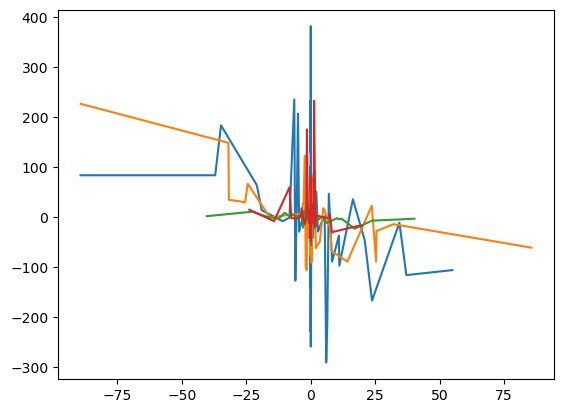

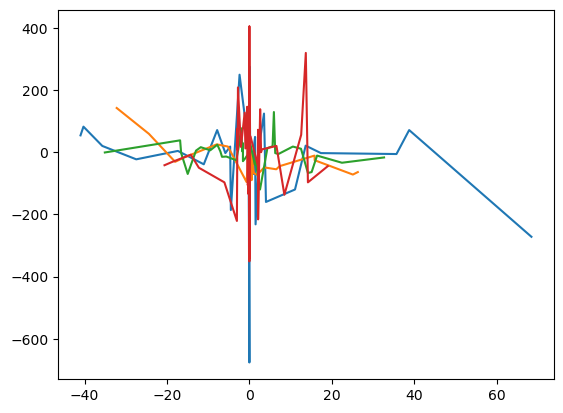

In [10]:
for i in [dif(t03,1),dif(t04,1),dif(t05,1),dif(t06,1)]:
    difjj = i[0].sort_values(by=0)
    plt.plot(difjj[0],difjj['lar'])
plt.show()
for i in [dif(t03,1),dif(t04,1),dif(t05,1),dif(t06,1)]:
    difas = i[1].sort_values(by=0)
    plt.plot(difas[0],difas['lar'])

# Changes in population with duration of immediately preceeding dry period

In [7]:
def wetdryanalysis(yr):
    rdry = rain.groupby('time.year')[yr][rain.groupby('time.year')[yr]==0]
    rwet = rain.groupby('time.year')[yr][rain.groupby('time.year')[yr]> 0]
    rseasdry,rseaswet = rdry[rdry.time.dt.month.isin(range(6,10))],rwet[rwet.time.dt.month.isin(range(6,10))]
    drywet=[]
    for j in [rseasdry, rseaswet]:
        s=1
        cum=[]
        for i in range(len(j.time)-1):
            if j.time[i+1].dt.date == j.time[i].dt.date+timedelta(1):
                s=s+1
                if(i==len(j.time)-2):
                    cum.append((s,pd.to_datetime(j.time[i].values).date()))
            else:
                cum.append((s,pd.to_datetime(j.time[i].values).date()))
                s=1
        drywet.append(cum)
    rseasdry.plot()
    rseaswet.plot(marker='o')
    plt.show()
    lar03= buckdata(yr).sum(axis=1)
    aftdry = lar03[lar03.index.isin(pd.to_datetime(np.array(drywet[0])[:,1])+timedelta(1))]
    aftwet = lar03[lar03.index.isin(pd.to_datetime(np.array(drywet[1])[:,1])+timedelta(1))]
    aftdry.plot()
    aftwet.plot()
    plt.scatter(lar03[lar03.index.month.isin(range(6,10))].index,lar03[lar03.index.month.isin(range(6,10))],marker='x',color='green')
    plt.title('No. of larvae after wet and dry period')
    plt.legend(['after dry','after wet', 'Daily count'])
    plt.ylabel('Larvae')
    plt.show()
    
    imaftdry=lar03[lar03.index.isin(pd.to_datetime(rseasdry.time.dt.date)+timedelta(1))]
    imaftwet=lar03[lar03.index.isin(pd.to_datetime(rseaswet.time.dt.date)+timedelta(1))]
    imaftdry.plot()
    imaftwet.plot()
    plt.scatter(lar03.index,lar03.values,marker='x',color='green')
    plt.title('No. of larvae after immediate dry and rainy day')
    plt.legend(['after dry','after wet', 'Daily count'])
    plt.ylabel('Larvae')
#     corrdry= pearsonr(rseasdry,lar03[lar03.index.isin(pd.to_datetime(rdry.time.dt.date)+timedelta(1))])
#     corrwet= pearsonr(rseaswet,lar03[lar03.index.isin(pd.to_datetime(rwet.time.dt.date)+timedelta(1))])
    return drywet, aftdry,aftwet, imaftdry,imaftwet, rseasdry, rseaswet

In [8]:
def extreme(yr,pc): # pc = percentile
    t = wetdryanalysis(yr)
    
    figure(figsize=(10,6))
    rain[rain.time.dt.month.isin(range(6,10))].groupby('time.year')[yr].plot(color='black',marker='P')
    # temp[(temp.index.year==2003)&(temp.index.month.isin(range(6,10)))]['MAX AIR TEMP oF'].plot()
    plt.legend(['Daily rain'])
    s=0
    for i in range(len(t[0][0])):
        t[3].iloc[s:s+np.array(t[0][0])[i,0]].plot(marker='^',secondary_y=True)
        s=s+np.array(t[0][0])[i,0]
    plt.legend(['dry period larv.'])
    s1=0
    for i in range(len(t[0][1])):
        t[4].iloc[s1:s1+np.array(t[0][1])[i,0]].plot(marker='x',secondary_y=True)
        s1=s1+np.array(t[0][1])[i,0]
    plt.ylabel('larvae')
#     plt.title('\n Larvae trends in continuous wet and dry periods')
    plt.show()
    
    wetbefdry=[]
    dryaftwet=[]
    dryaftwet2=[]
    for i in range(len(t[2].index)-1):
        if(t[2].index[i+1]!=t[2].index[i]+timedelta(1)):
            dryaftwet.append(t[2].index[i]+timedelta(1))
            wetbefdry.append(t[2].index[i])
    for i in range(len(t[2].index)-1):
        if(t[2].index[i+1]!=t[2].index[i]+timedelta(2)):
            dryaftwet2.append(t[2].index[i]+timedelta(2))
    b3 = buckdata(yr).sum(axis=1)
    # plt.plot(range(len(t[2])),t[2].values)
    # plt.plot(range(len(b3[b3.index.isin(dryaftwet)])),b3[b3.index.isin(dryaftwet)].values)
    t[2].plot(marker='x')
    b3[b3.index.isin(dryaftwet)].plot(marker='o')
    plt.title('larvae count after wet and wet+dry day')
    plt.legend(['after wet','after wet+dry'])
    plt.ylabel('larvae')
    plt.show()
    
    wetdry = pd.DataFrame(b3[b3.index.isin(wetbefdry)],columns=['wetbefdry'])
    wetdry['dryaftwet'] = b3[b3.index.isin(dryaftwet)].values
    wetdry['dif']=wetdry['dryaftwet']-wetdry['wetbefdry']
    
    for i in range(1,8):
        wetdry['rain'+str(i)]=rain[rain.time.dt.date.isin((wetdry.index-timedelta(i)).date)]
    for i in range(8):
        wetdry['temp'+str(i)]=temp[temp.index.isin(wetdry.index-timedelta(i))]['MAX AIR TEMP oF'].values
        
    rextreme = t[-1][t[-1]>=np.percentile(t[-1],pc)]
    print('rainfall day after extreme precipitation-',rain[rain.time.dt.date.isin(rextreme.time.dt.date+timedelta(1))].values)
    taftext = temp[temp.index.isin(pd.to_datetime(rextreme.time.dt.date+timedelta(1)))]['MAX AIR TEMP oF']
    b3[b3.index.isin(taftext.index-timedelta(1))].plot()
    b3[b3.index.isin(taftext.index)].plot()
    b3[b3.index.isin(taftext.index+timedelta(1))].plot()
    plt.title('Larvae counts just after extreme rain, \n one day before and after extreme rain')
    plt.legend(['before rain','after rain','1 day after rain'])
    
    print('extreme rainfall',rextreme.values)
    print(temp[temp.index.isin(pd.to_datetime(rextreme.time.dt.date))]['MAX AIR TEMP oF'])
    print(taftext)
    print(b3[b3>=np.percentile(b3,95)])

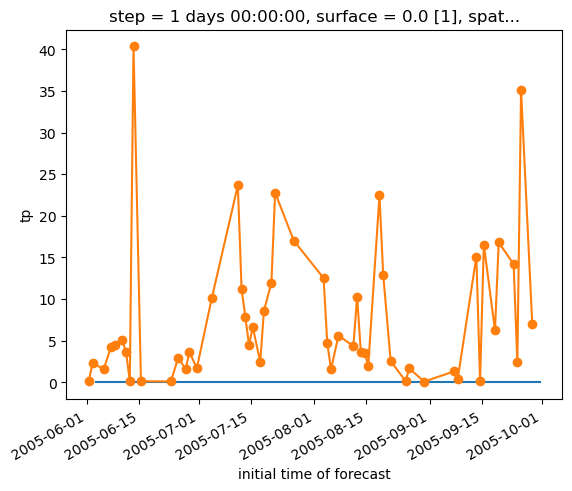

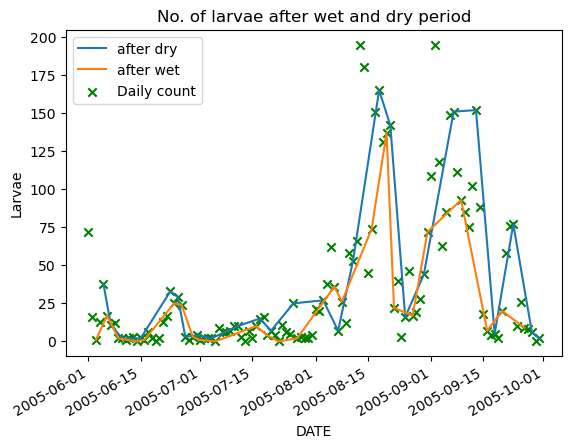

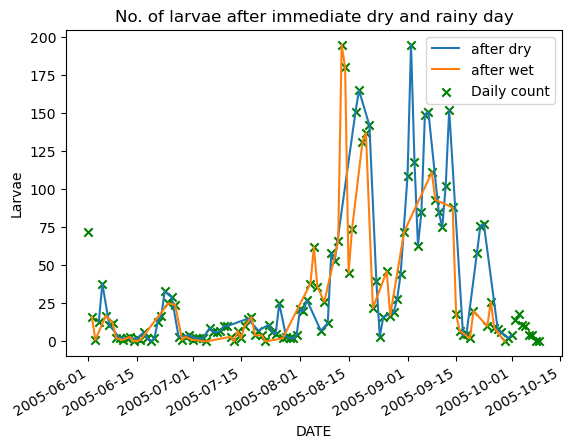

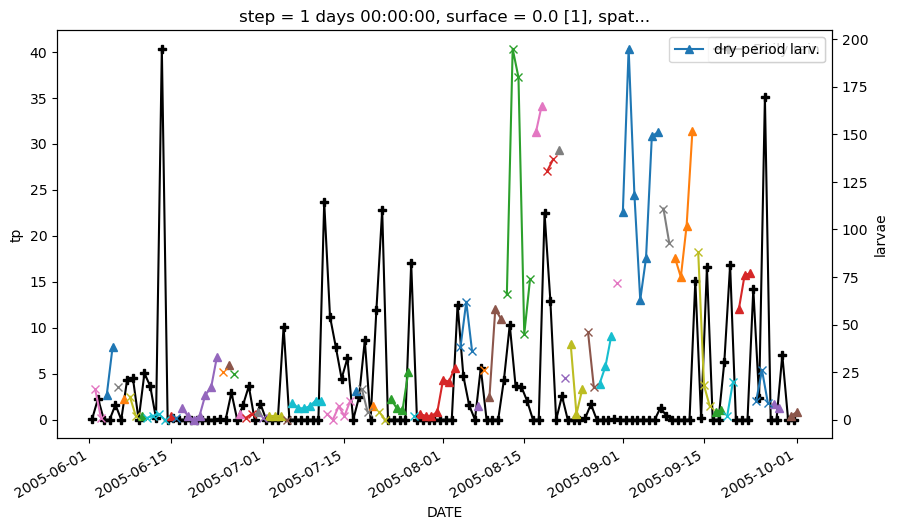

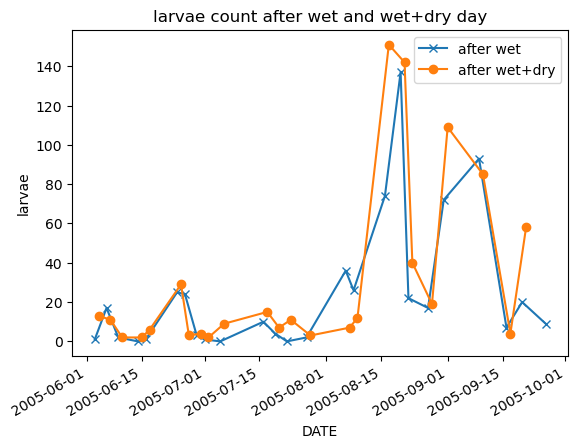

rainfall day after extreme precipitation- [ 0.       11.211112  0.      ]
extreme rainfall [40.34444  23.666666 35.077778]
date
2005-06-13    84.9
2005-07-11    82.8
2005-09-25    48.5
Name: MAX AIR TEMP oF, dtype: float64
date
2005-06-14    87.2
2005-07-12    80.6
2005-09-26    49.7
Name: MAX AIR TEMP oF, dtype: float64
DATE
2005-08-13    195.0
2005-08-14    180.0
2005-08-17    151.0
2005-08-18    165.0
2005-09-02    195.0
2005-09-07    151.0
2005-09-13    152.0
dtype: float64


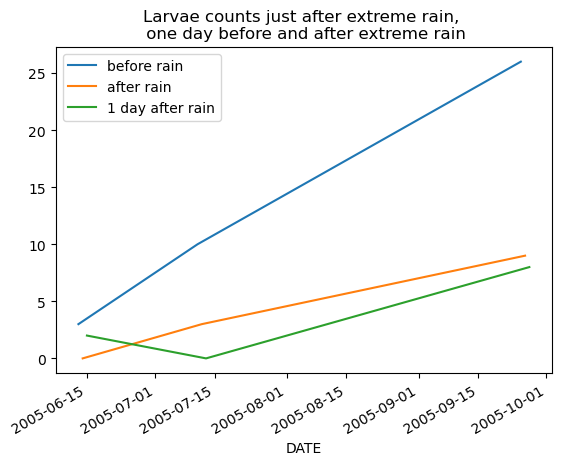

In [13]:
extreme(2005,95)

In [25]:
def extremelar(yr):
    lar = buckdata(yr).sum(axis=1)
    larext = lar[lar>=np.percentile(lar,95)]
    print(lar[lar.index.isin(larext.index-timedelta(1))])
    print(rain[rain.time.dt.date.isin((larext.index-timedelta(1)).date)].values)
    print(temp[temp.index.isin(larext.index-timedelta(1))])
    for i in range(2,8):
        print(rain[rain.time.dt.date.isin((larext.index-timedelta(i)).date)].values)

In [26]:
extremelar(2003)

DATE
2003-06-17    239.0
2003-08-06    413.0
2003-08-11    433.0
2003-08-12    535.0
2003-08-13    713.0
2003-08-14    737.0
2003-08-16    310.0
dtype: float64
[0.         1.3777777  0.         0.         2.3888886  0.
 0.11111111]
             DAY  MAX AIR TEMP oF  MIN AIR TEMP oF  AVG AIR TEMP oF  \
date                                                                  
2003-06-17  18.0             93.8             71.4             83.5   
2003-08-06   6.0             88.7             61.3             73.7   
2003-08-11  11.0             95.9             68.8             81.9   
2003-08-12  12.0             86.1             62.3             73.8   
2003-08-13  13.0             72.6             51.9             62.1   
2003-08-14  14.0             76.6             45.3             58.7   
2003-08-16  16.0             70.1             51.2             60.5   

            TOTAL PRECIP oF  MAX REL HUM %  
date                                        
2003-06-17             0.00           